# **5MIN OMNI & Nightside OCB Model**

**Author:** Arnav Singh 
**Date:** 2024-10-19

---

## **Abstract**

For this notebook, the 5MIN merged OMNI dataset will be used to create different models attempting to model the OCB locations with various inputs and models. 

## **Keywords**

- Keyword 1
- Keyword 2
- Keyword 3

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Data Description](#data-description)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Model Selection](#model-selection)
7. [Model Training](#model-training)
8. [Model Evaluation](#model-evaluation)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Results and Discussion](#results-and-discussion)
11. [Conclusion](#conclusion)
12. [References](#references)
13. [Appendix](#appendix)

---

## **Introduction**

Introduce the problem statement, background information, and the significance of the modeling project.

---

In [13]:
### Imports ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import keras_tuner as kt

In [14]:
nightside_df = pd.read_parquet('data/5minData.parquet')
nightside_df.describe()

b1e_date    b1e_geo_lat   b1e_geo_long  \
count                         483943  483943.000000  483943.000000   
mean   2002-10-31 14:23:44.453725312     -15.572451     178.765413   
min              1982-12-31 23:59:59     -81.520000       0.000000   
25%       1998-07-09 17:40:21.500000     -68.110000      80.950000   
50%              2003-05-20 15:01:22     -52.090000     169.140000   
75%       2007-08-25 17:40:04.500000      61.290000     283.840000   
max              2012-12-31 22:34:38      81.510000     360.000000   
std                              NaN      62.045432     110.172856   

         b1e_mag_lat   b1e_mag_long        b1e_mlt  \
count  483943.000000  483943.000000  483943.000000   
mean      -15.990386      13.539736      14.965626   
min       -87.450000    -180.000000       0.000000   
25%       -66.870000     -64.675000       6.670000   
50%       -62.050000      24.880000      18.230000   
75%        65.270000      90.290000      20.300000   
max        88.210000     180.000000      24.000000   
std        63.470798      97.254654       6.855460   

                            b2e_date    b2e_geo_lat   b2e_geo_long  \
count                         483943  483943.000000  483943.000000   
mean   2002-10-18 09:01:19.679699712     -16.511905     176.348897   
min              1982-12-31 23:59:59     -81.520000       0.000000   
25%       1998-06-20 16:40:46.500000     -71.170000      79.490000   
50%              2003-05-10 10:12:01     -53.900000     166.770000   
75%              2007-08-12 21:35:19      62.820000     278.240000   
max              2012-12-31 22:19:20      81.520000     360.000000   
std                              NaN      63.820807     109.406169   

         b2e_mag_lat  ...  PROTON_DENSITY_n/cc  FLOW_PRESSURE_nPa  \
count  483943.000000  ...        483943.000000      483943.000000   
mean      -16.722341  ...             6.743317           2.361047   
min       -89.660000  ...             0.090000           0.020000   
25%       -67.860000  ...             3.350000           1.340000   
50%       -63.960000  ...             5.200000           1.920000   
75%        66.630000  ...             8.300000           2.790000   
max        89.500000  ...            71.440000          89.510000   
std        65.150619  ...             5.383610           1.838813   

           5-M_AE_nT  5-M_AL-INDEX_nT  SYM/H_INDEX_nT  5-M_PC(N)-INDEX_  \
count  483943.000000    483943.000000   483943.000000     483943.000000   
mean      215.201666      -136.636346      -13.517668          1.143528   
min         2.000000     -3032.000000     -475.000000        -16.220000   
25%        54.000000      -191.000000      -21.000000          0.200000   
50%       129.000000       -70.000000      -10.000000          0.810000   
75%       302.000000       -24.000000       -2.000000          1.810000   
max      3274.000000        41.000000       97.000000         29.080000   
std       227.164017       169.071431       20.911351          1.457352   

                  BT             qc       sin_term        dFMP_dt  
count  483943.000000  483943.000000  242034.000000  242034.000000  
mean        4.713087      -0.016267       0.448816    4203.285129  
min         0.010000      -3.141593       0.000000       0.000000  
25%         2.643728      -1.654680       0.137650    1002.907335  
50%         4.062032       0.000000       0.417797    3017.425966  
75%         5.928912       1.610380       0.744907    5934.565018  
max        56.373543       3.141593       1.000000  120906.366746  
std         3.188698       1.805485       0.330131    4580.793781  

[8 rows x 62 columns]

In [15]:
nightsideN_df = nightside_df[nightside_df['b6_mag_lat'] > 0]
nightsideN_df.describe()

b1e_date    b1e_geo_lat   b1e_geo_long  \
count                         177785  177785.000000  177785.000000   
mean   2001-11-26 02:54:29.968124544      64.395576     195.269209   
min              1982-12-31 23:59:59     -13.320000       0.000000   
25%              1997-08-15 12:51:36      59.680000      79.690000   
50%              2002-10-31 15:35:50      65.010000     217.900000   
75%              2007-02-28 23:29:49      69.730000     296.280000   
max              2012-12-31 16:30:15      81.510000     360.000000   
std                              NaN       6.878217     114.138969   

         b1e_mag_lat   b1e_mag_long        b1e_mlt  \
count  177785.000000  177785.000000  177785.000000   
mean       66.740700      16.310942      15.774579   
min       -20.820000    -180.000000       0.000000   
25%        64.310000     -69.810000       7.720000   
50%        67.210000      34.840000      18.170000   
75%        69.610000      99.060000      19.780000   
max        88.210000     180.000000      24.000000   
std         4.158779      98.249432       5.815778   

                            b2e_date    b2e_geo_lat   b2e_geo_long  \
count                         177785  177785.000000  177785.000000   
mean   2001-11-06 19:54:05.238057216      65.999430     198.007297   
min              1982-12-31 23:59:59     -13.320000       0.000000   
25%              1997-07-02 20:09:55      61.180000      84.050000   
50%              2002-10-27 19:37:55      66.670000     222.980000   
75%              2006-12-31 23:59:59      71.140000     297.510000   
max              2012-12-31 16:30:15      81.520000     360.000000   
std                              NaN       6.746237     113.825841   

         b2e_mag_lat  ...  PROTON_DENSITY_n/cc  FLOW_PRESSURE_nPa  \
count  177785.000000  ...        177785.000000      177785.000000   
mean       68.372214  ...             6.894395           2.464077   
min       -20.600000  ...             0.100000           0.050000   
25%        65.860000  ...             3.410000           1.410000   
50%        68.350000  ...             5.300000           2.000000   
75%        70.800000  ...             8.510000           2.910000   
max        89.500000  ...            71.440000          89.510000   
std         4.152985  ...             5.477645           1.938143   

           5-M_AE_nT  5-M_AL-INDEX_nT  SYM/H_INDEX_nT  5-M_PC(N)-INDEX_  \
count  177785.000000    177785.000000   177785.000000     177785.000000   
mean      231.056130      -149.199978      -14.167466          1.242827   
min         2.000000     -2987.000000     -470.000000        -16.220000   
25%        58.000000      -213.000000      -22.000000          0.260000   
50%       142.000000       -82.000000      -10.000000          0.920000   
75%       329.000000       -26.000000       -2.000000          1.950000   
max      3274.000000        40.000000       97.000000         29.080000   
std       238.114671       177.361040       21.552946          1.516655   

                  BT             qc      sin_term        dFMP_dt  
count  177785.000000  177785.000000  88089.000000   88089.000000  
mean        4.820964      -0.041195      0.452250    4359.027297  
min         0.014142      -3.141593      0.000000       0.000000  
25%         2.720588      -1.702410      0.138607    1043.884192  
50%         4.163856      -0.051759      0.422838    3126.153708  
75%         6.052983       1.609522      0.751922    6162.463610  
max        56.006136       3.141593      1.000000  120906.366746  
std         3.243933       1.821254      0.331545    4737.257628  

[8 rows x 62 columns]

In [16]:
nightsideS_df = nightside_df[nightside_df['b6_mag_lat'] < 0]
nightsideS_df.describe()

b1e_date    b1e_geo_lat   b1e_geo_long  \
count                         306158  306158.000000  306158.000000   
mean   2003-05-16 17:36:58.652871936     -62.009635     169.181711   
min              1982-12-31 23:59:59     -81.520000       0.000000   
25%       1999-01-06 02:30:54.250000     -74.240000      81.302500   
50%              2003-09-11 12:22:12     -61.730000     147.390000   
75%              2007-12-02 16:39:11     -53.130000     271.870000   
max              2012-12-31 22:34:38       3.630000     360.000000   
std                              NaN      13.701116     106.637089   

         b1e_mag_lat   b1e_mag_long        b1e_mlt  \
count  306158.000000  306158.000000  306158.000000   
mean      -64.032071      11.930506      14.495870   
min       -87.450000    -180.000000       0.000000   
25%       -68.260000     -59.600000       6.280000   
50%       -65.870000      22.330000      18.310000   
75%       -62.780000      80.090000      20.680000   
max        24.130000     180.000000      24.000000   
std         8.677764      96.635987       7.351661   

                            b2e_date    b2e_geo_lat   b2e_geo_long  \
count                         306158  306158.000000  306158.000000   
mean   2003-05-07 00:48:41.621466624     -64.425981     163.771931   
min              1982-12-31 23:59:59     -81.520000       0.000000   
25%              1998-12-31 23:59:59     -75.930000      78.310000   
50%       2003-09-06 19:23:39.500000     -64.950000     142.260000   
75%              2007-11-29 21:17:35     -54.910000     256.877500   
max              2012-12-31 22:19:20      -5.000000     360.000000   
std                              NaN      12.754414     104.719860   

         b2e_mag_lat  ...  PROTON_DENSITY_n/cc  FLOW_PRESSURE_nPa  \
count  306158.000000  ...        306158.000000      306158.000000   
mean      -66.136484  ...             6.655587           2.301217   
min       -89.660000  ...             0.090000           0.020000   
25%       -69.260000  ...             3.310000           1.310000   
50%       -66.950000  ...             5.130000           1.870000   
75%       -64.490000  ...             8.180000           2.730000   
max        20.230000  ...            70.800000          73.140000   
std         7.264284  ...             5.326285           1.775851   

           5-M_AE_nT  5-M_AL-INDEX_nT  SYM/H_INDEX_nT  5-M_PC(N)-INDEX_  \
count  306158.000000    306158.000000   306158.000000     306158.000000   
mean      205.995029      -129.340684      -13.140333          1.085865   
min         2.000000     -3032.000000     -475.000000        -13.410000   
25%        52.000000      -179.000000      -20.000000          0.160000   
50%       122.000000       -64.000000      -10.000000          0.750000   
75%       287.000000       -22.000000       -1.000000          1.720000   
max      3059.000000        41.000000       95.000000         21.900000   
std       220.032326       163.623713       20.520172          1.418596   

                  BT             qc       sin_term        dFMP_dt  
count  306158.000000  306158.000000  153945.000000  153945.000000  
mean        4.650444      -0.001792       0.446851    4114.167769  
min         0.010000      -3.141593       0.000000       0.000000  
25%         2.603037      -1.625385       0.137110     980.434720  
50%         4.004741       0.024818       0.414794    2958.935395  
75%         5.849829       1.610867       0.741019    5817.505626  
max        56.373543       3.141593       1.000000   95465.606665  
std         3.154491       1.796108       0.329304    4486.395279  

[8 rows x 62 columns]

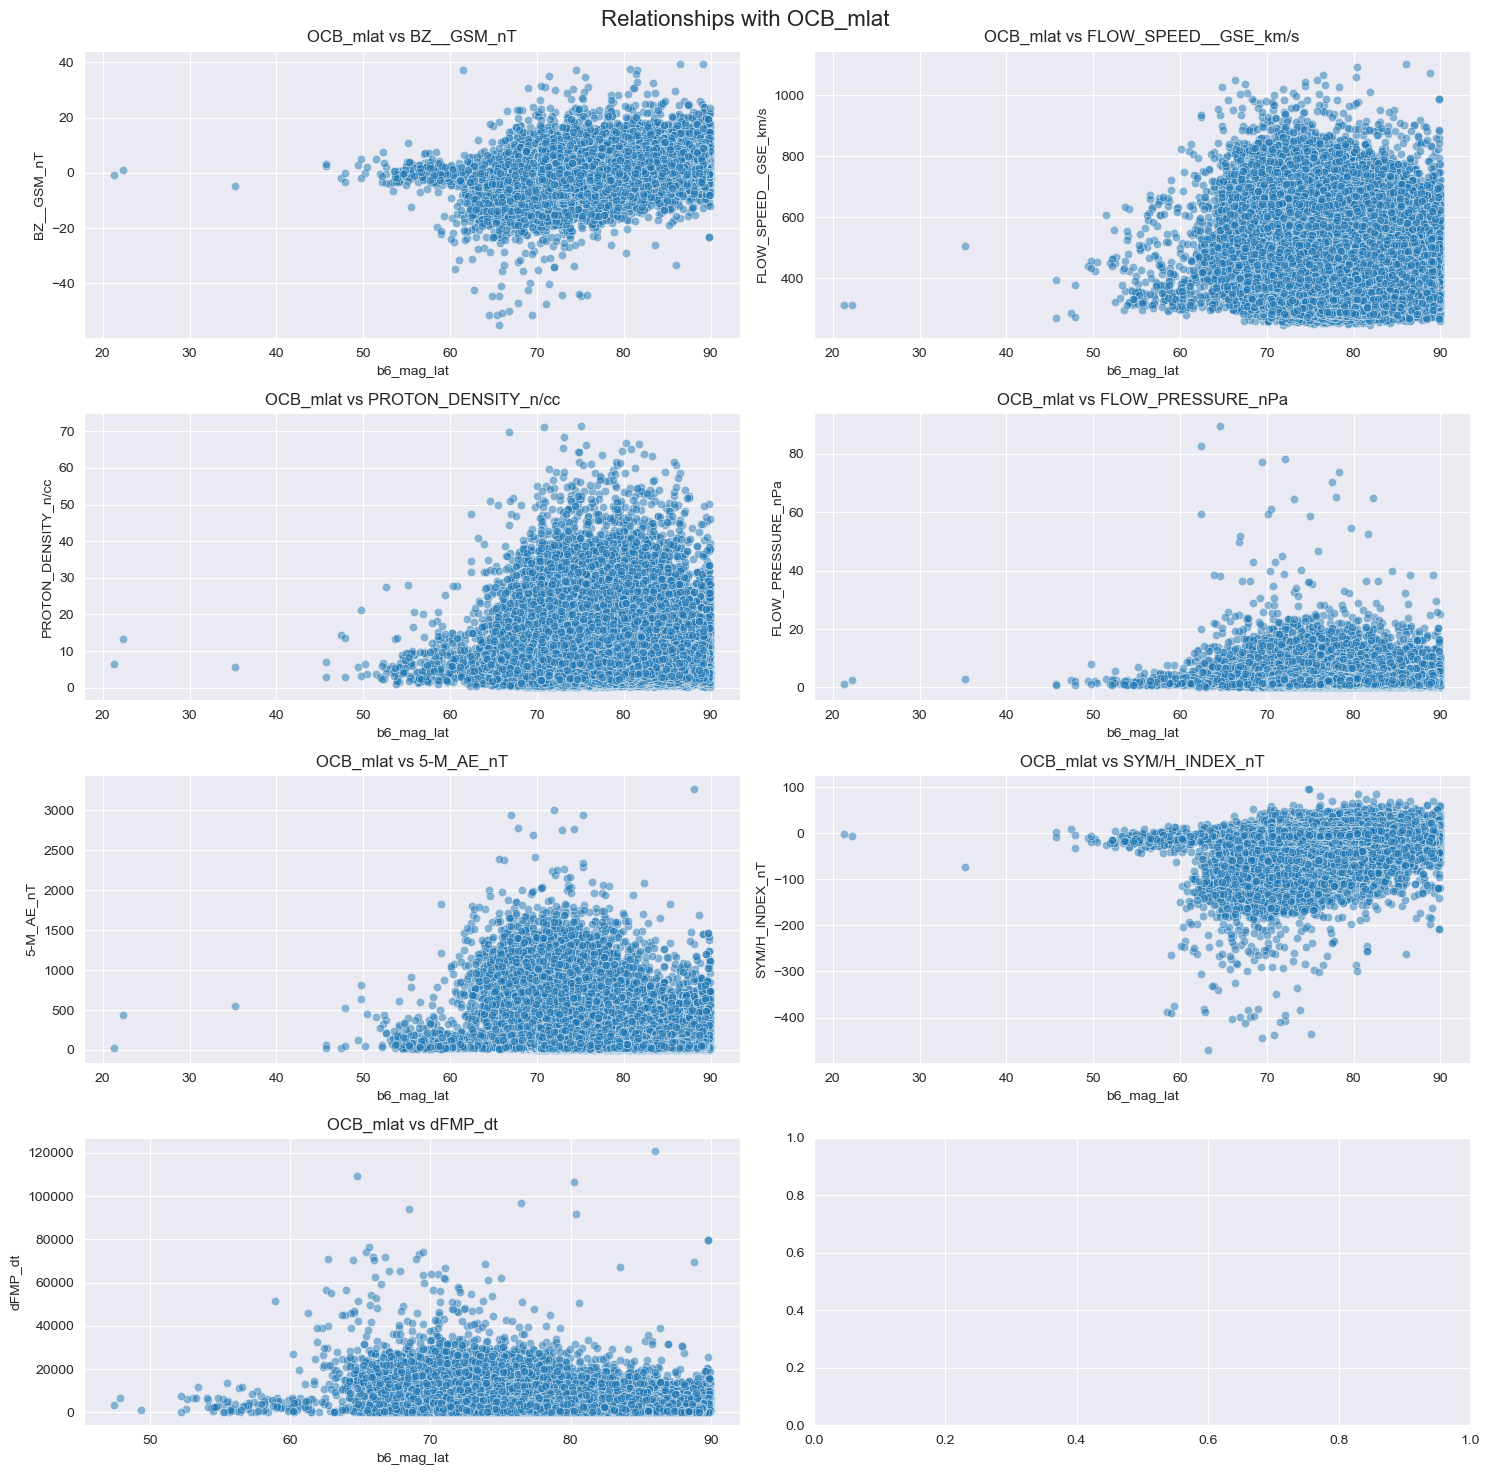

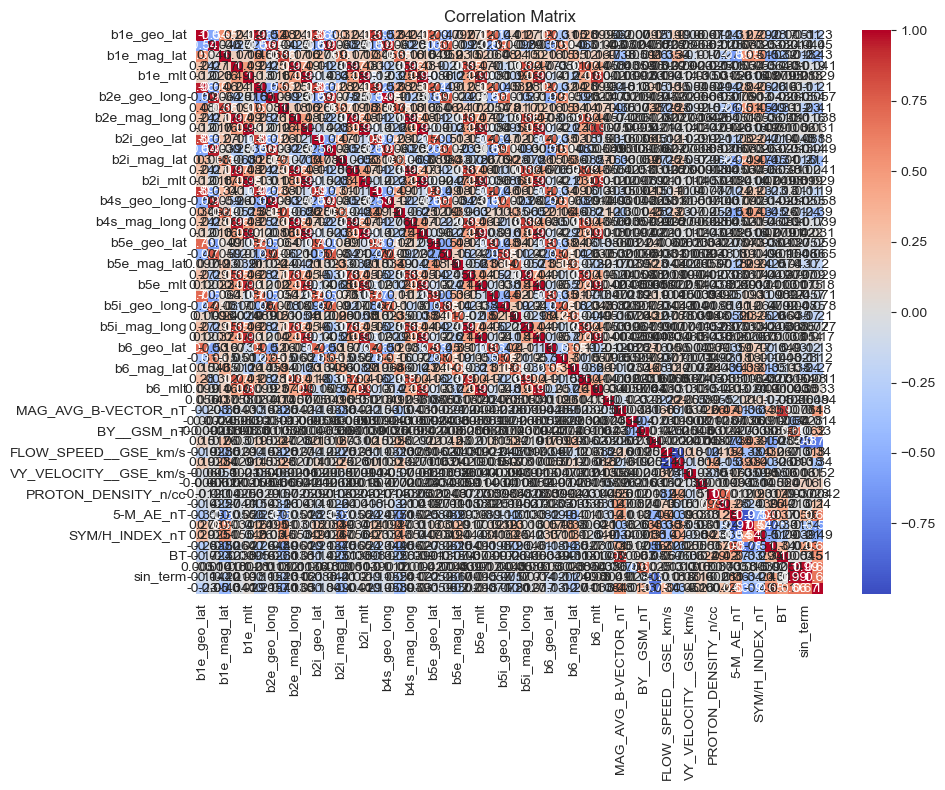

In [17]:
def plot_df(df): 
    # Create subplots for each comparison
    fig, axes = plt.subplots(4, 2, figsize=(15, 15))
    fig.suptitle('Relationships with OCB_mlat', fontsize=16)
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # List of columns to compare with OCB_mlat (excluding date/time columns)
    columns_to_plot = ['BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s', 'PROTON_DENSITY_n/cc', 
                       'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'SYM/H_INDEX_nT' , 'dFMP_dt']
    
    # Create scatter plots
    for i, col in enumerate(columns_to_plot):
        sns.scatterplot(data=df, x='b6_mag_lat', y=col, ax=axes[i], alpha=0.5)
        axes[i].set_title(f'OCB_mlat vs {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Create correlation plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
                annot=True, 
                cmap='coolwarm',
                center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
plot_df(nightsideN_df)

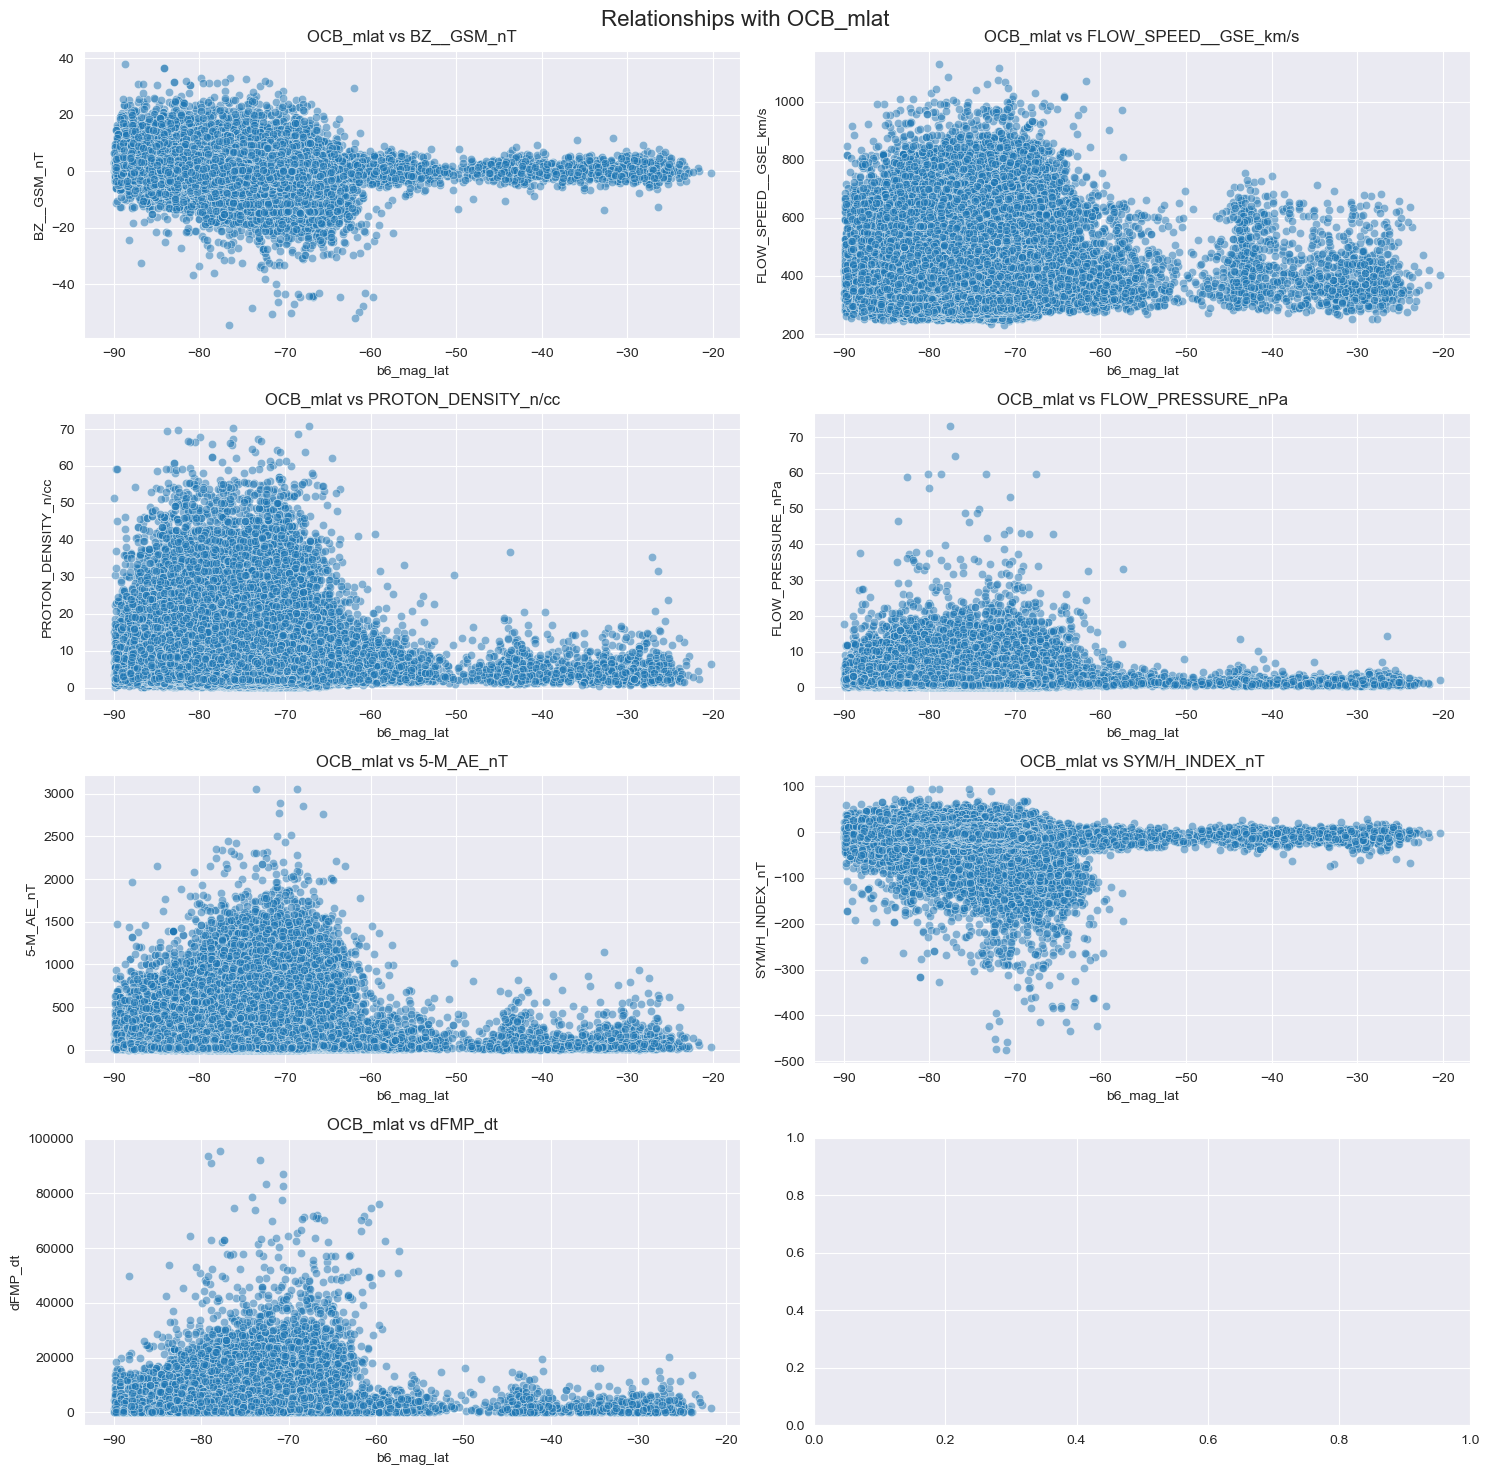

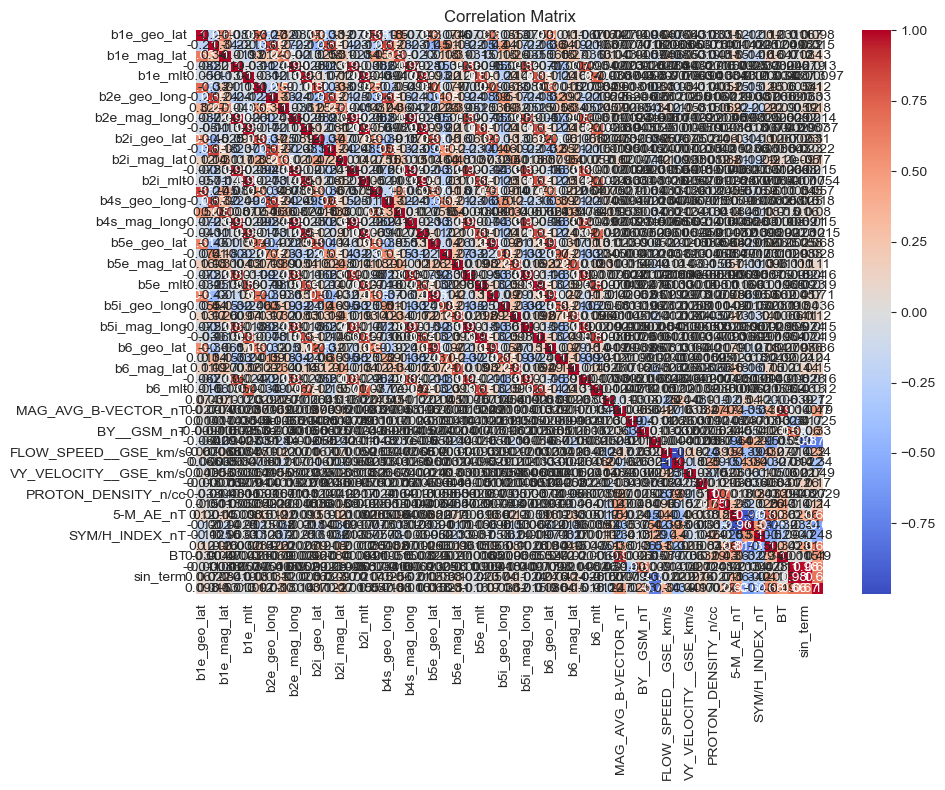

In [18]:
plot_df(nightsideS_df)

In [19]:
### ML MODELS ###

def create_latitude_bins(y, n_bins=10):
    """
    Create latitude bins with approximately equal number of samples in each bin
    """
    # Get bin edges using quantiles
    _, bin_edges = pd.qcut(y, q=n_bins, retbins=True, duplicates='drop')
    
    # Create bin labels
    bin_labels = [f"{bin_edges[i]:.1f} to {bin_edges[i+1]:.1f}" 
                 for i in range(len(bin_edges)-1)]
    
    # Assign data points to bins
    bins = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)
    
    return bins, bin_labels, bin_edges

def evaluate_classifier(y_true, y_pred, model_name):
    """Calculate and return evaluation metrics for a classification model"""
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Macro Avg F1': report['macro avg']['f1-score'],
        'Weighted Avg F1': report['weighted avg']['f1-score']
    }

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    """Plot confusion matrix for the classifier"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def predict_class_with_all_models(input_data, models, scaler, bin_edges, bin_labels):
    """Make classification predictions using all trained models"""
    scaled_input = scaler.transform(input_data)
    predictions = {}
    
    for name, model in models.items():
        pred_bin = model.predict(scaled_input)[0]
        predictions[name] = bin_labels[pred_bin]
        
    return predictions


def create_nn_classifier(input_shape, n_classes):
    """Create a robust neural network classifier
    
    Args:
        input_shape (tuple): Shape of input features (n_features,)
        n_classes (int): Number of output classes
    """
    # Ensure input_shape is a tuple
    if isinstance(input_shape, int):
        input_shape = (input_shape,)
        
    model = tf.keras.Sequential([
        # Input layer with explicit shape specification
        layers.Input(shape=input_shape),
        
        # First dense layer with batch normalization and dropout
        layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        
        # Second dense layer
        layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        
        # Third dense layer
        layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(n_classes, activation='softmax')
    ])
    
    # Use a fixed learning rate instead of a scheduler
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def train_classification_models(df, hemisphere='north', n_bins=10):
    """
    Train and evaluate multiple classification models including neural network
    """
    features = [
        'b6_mlt', 'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s',
        'PROTON_DENSITY_n/cc', 'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
    ]
    target = 'b6_mag_lat'
    
    # Prepare data
    df = df.dropna(subset=features + [target])
    X = df[features]
    y = df[target]
    
    # Create bins for latitude values
    y_binned, bin_labels, bin_edges = create_latitude_bins(y, n_bins)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binned, test_size=0.2, random_state=42, stratify=y_binned
    )
    
    # Scale features before training
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models dictionary (previous models remain the same)
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'params': {
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        }
    }
    
    # Train and evaluate traditional models
    results = []
    trained_models = {}
    
    for name, config in models.items():
        print(f"\nTraining {name}...")
        
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        trained_models[name] = best_model
        
        y_pred = best_model.predict(X_test_scaled)
        metrics = evaluate_classifier(y_test, y_pred, name)
        results.append(metrics)
        
        plot_confusion_matrix(y_test, y_pred, bin_labels, name)
        
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=bin_labels))
    
    # Train Neural Network
    print("\nTraining Neural Network...")
    
    # Create and train neural network
    nn_model = create_nn_classifier((X_train_scaled.shape[1],), n_bins)
    
    # Modified callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
    
    history = nn_model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Callbacks for neural network
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
    
    history = nn_model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Evaluate neural network
    y_pred_nn = np.argmax(nn_model.predict(X_test_scaled), axis=1)
    nn_metrics = evaluate_classifier(y_test, y_pred_nn, "Neural Network")
    results.append(nn_metrics)
    trained_models["Neural Network"] = nn_model
    
    # Plot confusion matrix for neural network
    plot_confusion_matrix(y_test, y_pred_nn, bin_labels, "Neural Network")
    print("\nNeural Network Classification Report:")
    print(classification_report(y_test, y_pred_nn, target_names=bin_labels))
    
    # Plot neural network training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot model comparisons including neural network
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Accuracy Comparison ({hemisphere} hemisphere)')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='Weighted Avg F1', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Weighted F1 Score Comparison ({hemisphere} hemisphere)')
    
    plt.tight_layout()
    plt.show()
    
    return results_df, trained_models, scaler, bin_edges, bin_labels, history


Training North Hemisphere Models...

Training Logistic Regression...


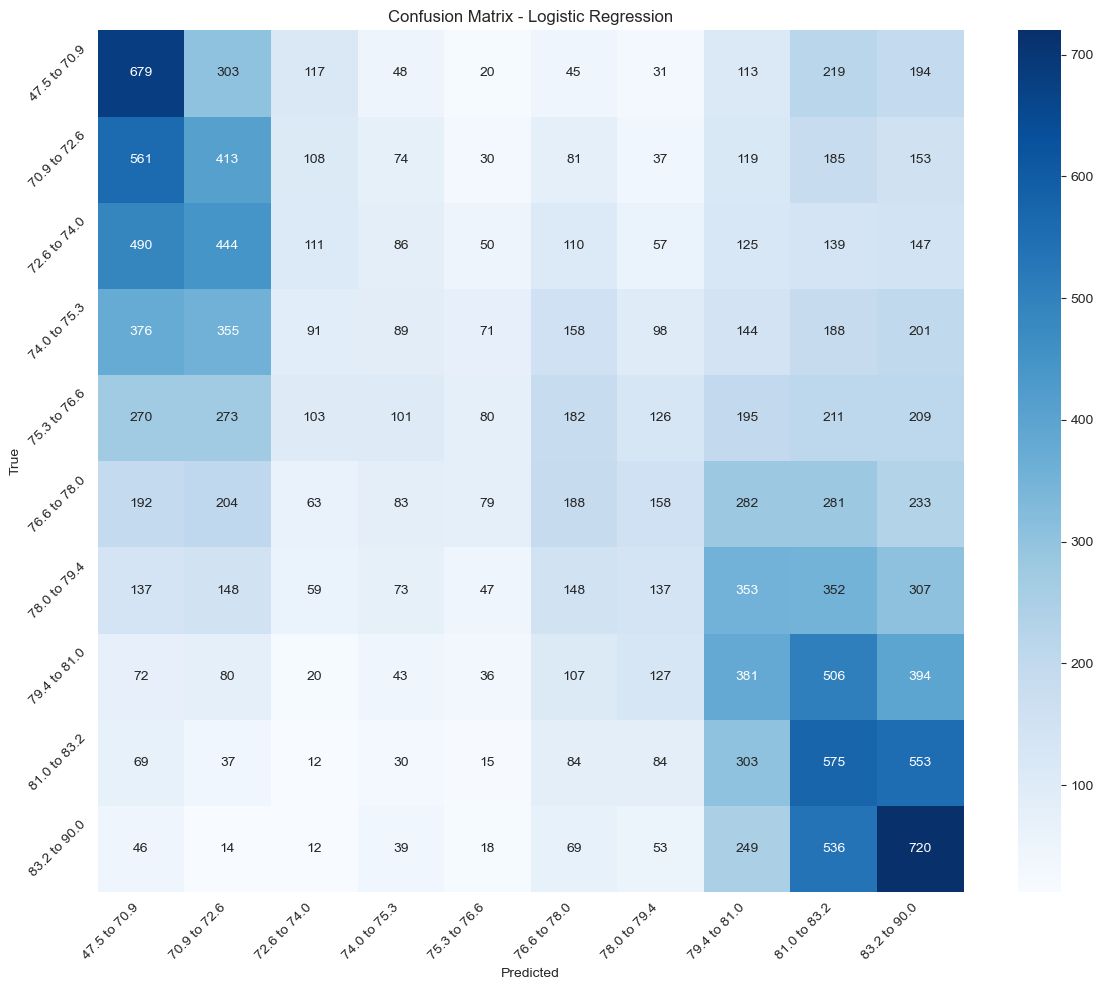

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 70.9       0.23      0.38      0.29      1769
70.9 to 72.6       0.18      0.23      0.20      1761
72.6 to 74.0       0.16      0.06      0.09      1759
74.0 to 75.3       0.13      0.05      0.07      1771
75.3 to 76.6       0.18      0.05      0.07      1750
76.6 to 78.0       0.16      0.11      0.13      1763
78.0 to 79.4       0.15      0.08      0.10      1761
79.4 to 81.0       0.17      0.22      0.19      1766
81.0 to 83.2       0.18      0.33      0.23      1762
83.2 to 90.0       0.23      0.41      0.30      1756

    accuracy                           0.19     17618
   macro avg       0.18      0.19      0.17     17618
weighted avg       0.18      0.19      0.17     17618


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


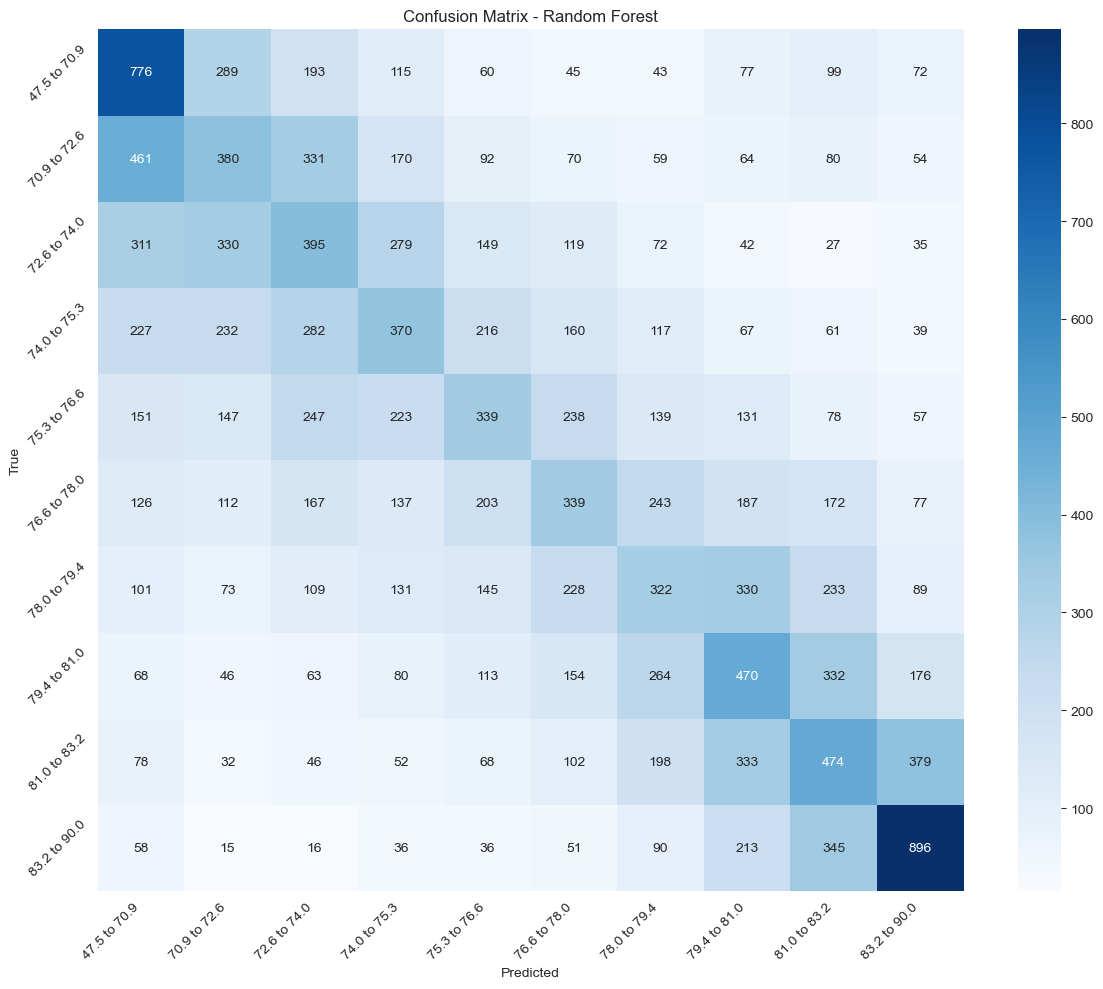

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

47.5 to 70.9       0.33      0.44      0.38      1769
70.9 to 72.6       0.23      0.22      0.22      1761
72.6 to 74.0       0.21      0.22      0.22      1759
74.0 to 75.3       0.23      0.21      0.22      1771
75.3 to 76.6       0.24      0.19      0.21      1750
76.6 to 78.0       0.23      0.19      0.21      1763
78.0 to 79.4       0.21      0.18      0.19      1761
79.4 to 81.0       0.25      0.27      0.26      1766
81.0 to 83.2       0.25      0.27      0.26      1762
83.2 to 90.0       0.48      0.51      0.49      1756

    accuracy                           0.27     17618
   macro avg       0.26      0.27      0.27     17618
weighted avg       0.26      0.27      0.27     17618


Training KNN...


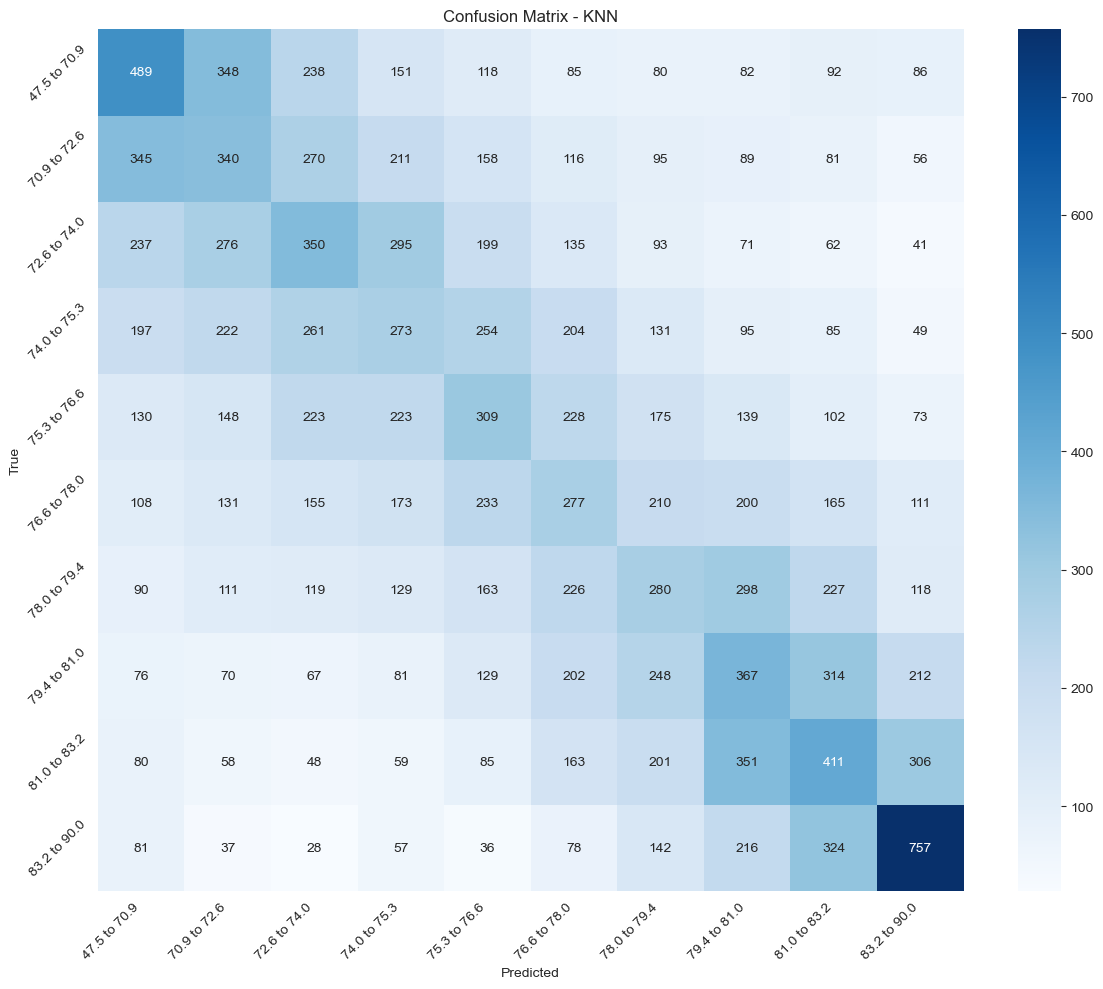

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 70.9       0.27      0.28      0.27      1769
70.9 to 72.6       0.20      0.19      0.19      1761
72.6 to 74.0       0.20      0.20      0.20      1759
74.0 to 75.3       0.17      0.15      0.16      1771
75.3 to 76.6       0.18      0.18      0.18      1750
76.6 to 78.0       0.16      0.16      0.16      1763
78.0 to 79.4       0.17      0.16      0.16      1761
79.4 to 81.0       0.19      0.21      0.20      1766
81.0 to 83.2       0.22      0.23      0.23      1762
83.2 to 90.0       0.42      0.43      0.42      1756

    accuracy                           0.22     17618
   macro avg       0.22      0.22      0.22     17618
weighted avg       0.22      0.22      0.22     17618


Training Decision Tree...


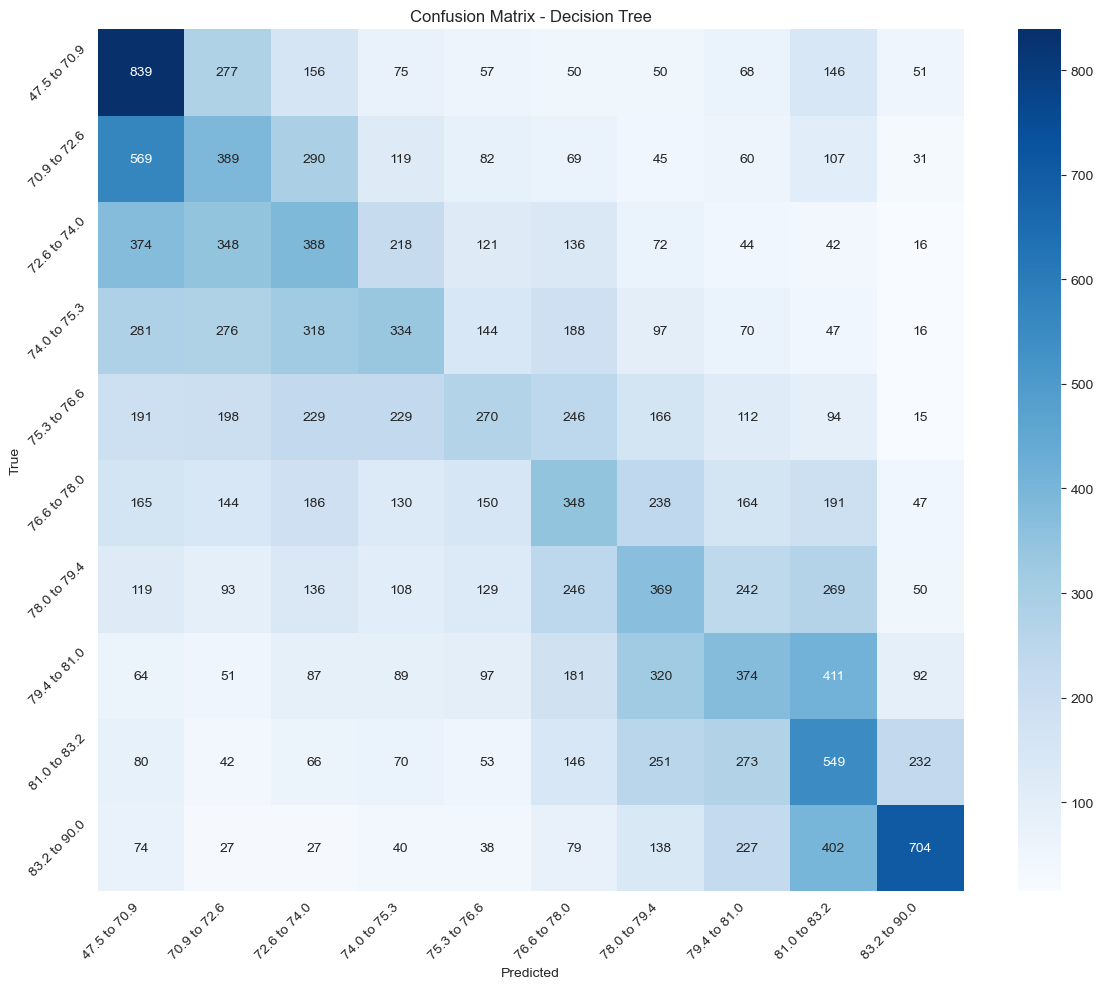

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

47.5 to 70.9       0.30      0.47      0.37      1769
70.9 to 72.6       0.21      0.22      0.22      1761
72.6 to 74.0       0.21      0.22      0.21      1759
74.0 to 75.3       0.24      0.19      0.21      1771
75.3 to 76.6       0.24      0.15      0.19      1750
76.6 to 78.0       0.21      0.20      0.20      1763
78.0 to 79.4       0.21      0.21      0.21      1761
79.4 to 81.0       0.23      0.21      0.22      1766
81.0 to 83.2       0.24      0.31      0.27      1762
83.2 to 90.0       0.56      0.40      0.47      1756

    accuracy                           0.26     17618
   macro avg       0.26      0.26      0.26     17618
weighted avg       0.26      0.26      0.26     17618


Training Neural Network...
Epoch 1/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1752 - loss: 2.2896 - val_accuracy: 0.2302 

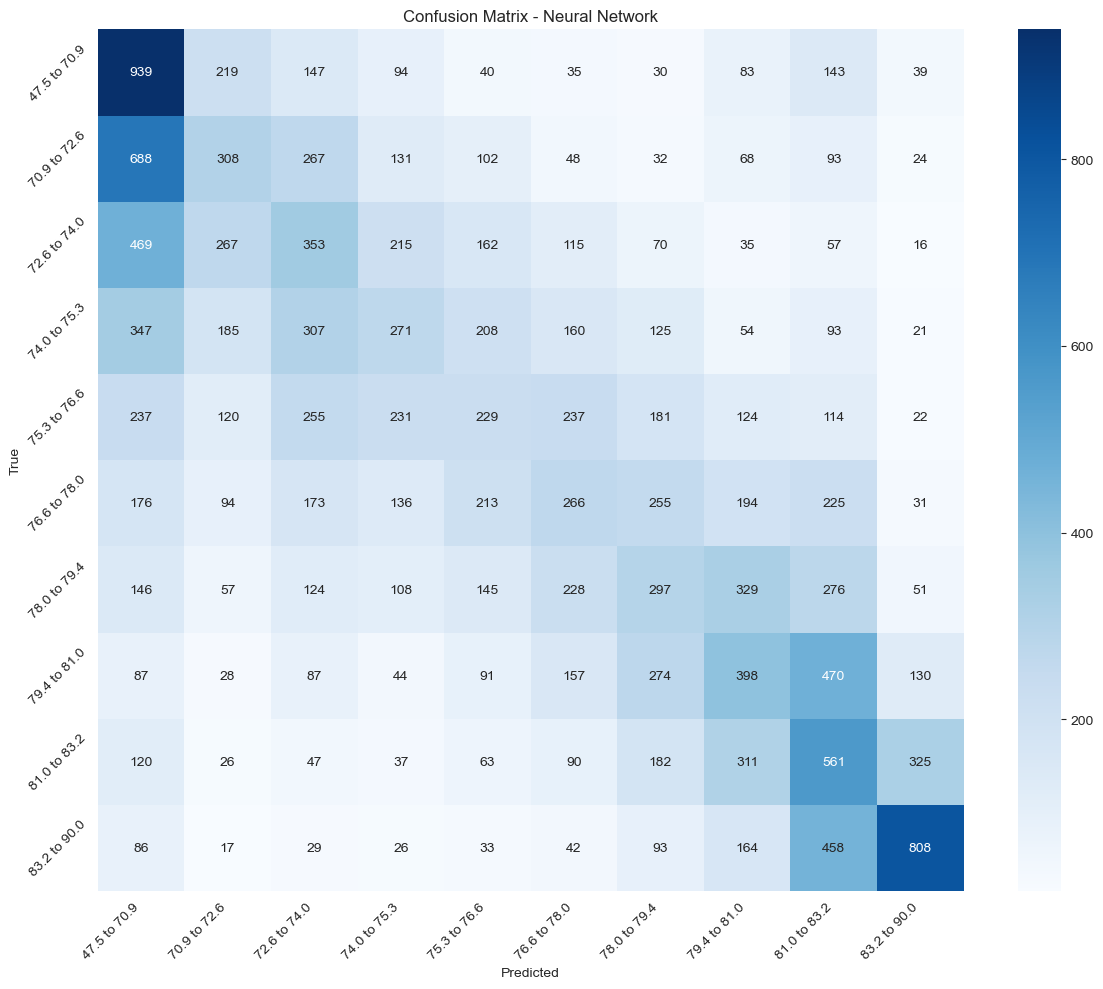


Neural Network Classification Report:
              precision    recall  f1-score   support

47.5 to 70.9       0.28      0.53      0.37      1769
70.9 to 72.6       0.23      0.17      0.20      1761
72.6 to 74.0       0.20      0.20      0.20      1759
74.0 to 75.3       0.21      0.15      0.18      1771
75.3 to 76.6       0.18      0.13      0.15      1750
76.6 to 78.0       0.19      0.15      0.17      1763
78.0 to 79.4       0.19      0.17      0.18      1761
79.4 to 81.0       0.23      0.23      0.23      1766
81.0 to 83.2       0.23      0.32      0.26      1762
83.2 to 90.0       0.55      0.46      0.50      1756

    accuracy                           0.25     17618
   macro avg       0.25      0.25      0.24     17618
weighted avg       0.25      0.25      0.24     17618



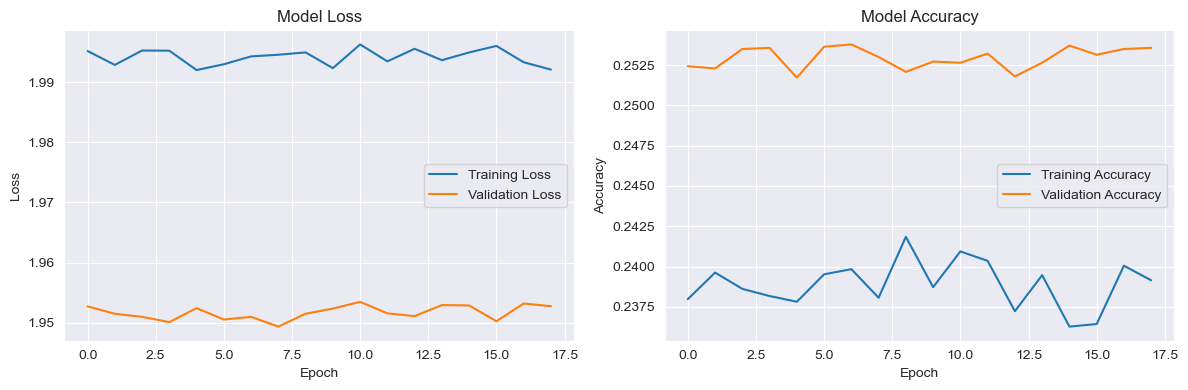

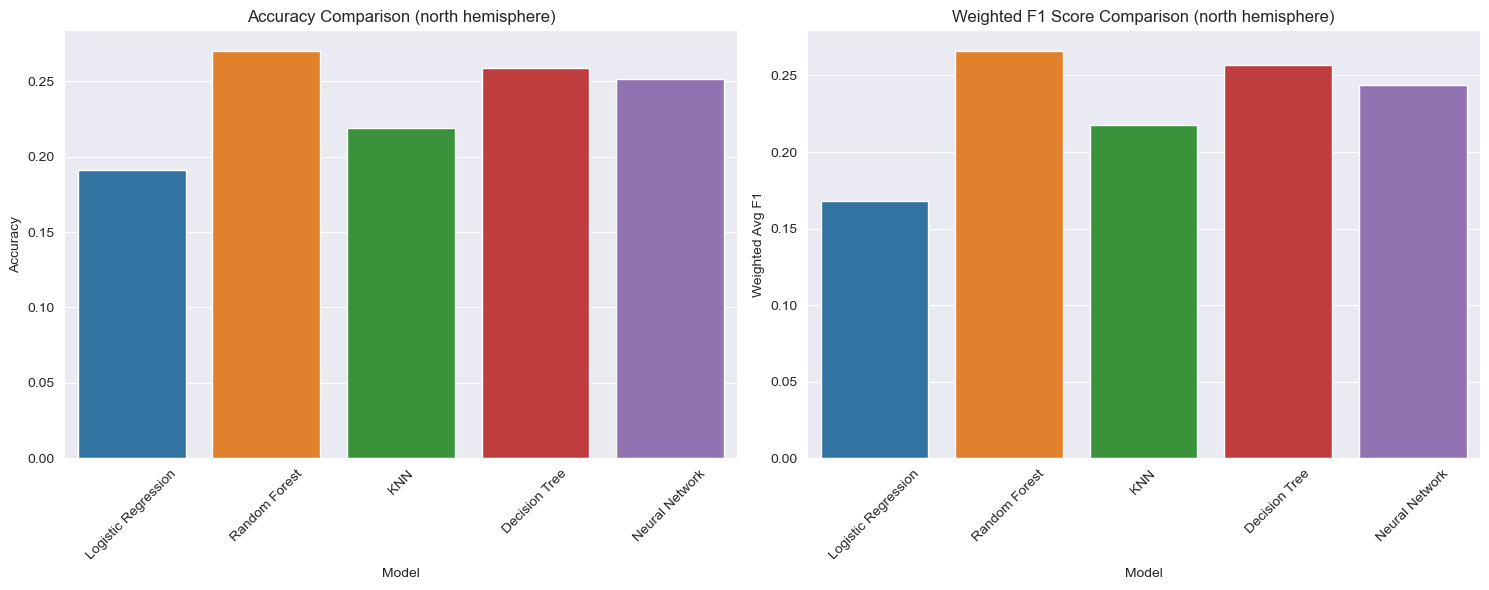


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.191452      0.168040         0.168079
1        Random Forest  0.270235      0.266130         0.266117
2                  KNN  0.218697      0.217863         0.217810
3        Decision Tree  0.259053      0.256927         0.256925
4       Neural Network  0.251447      0.243785         0.243783

Training South Hemisphere Models...

Training Logistic Regression...


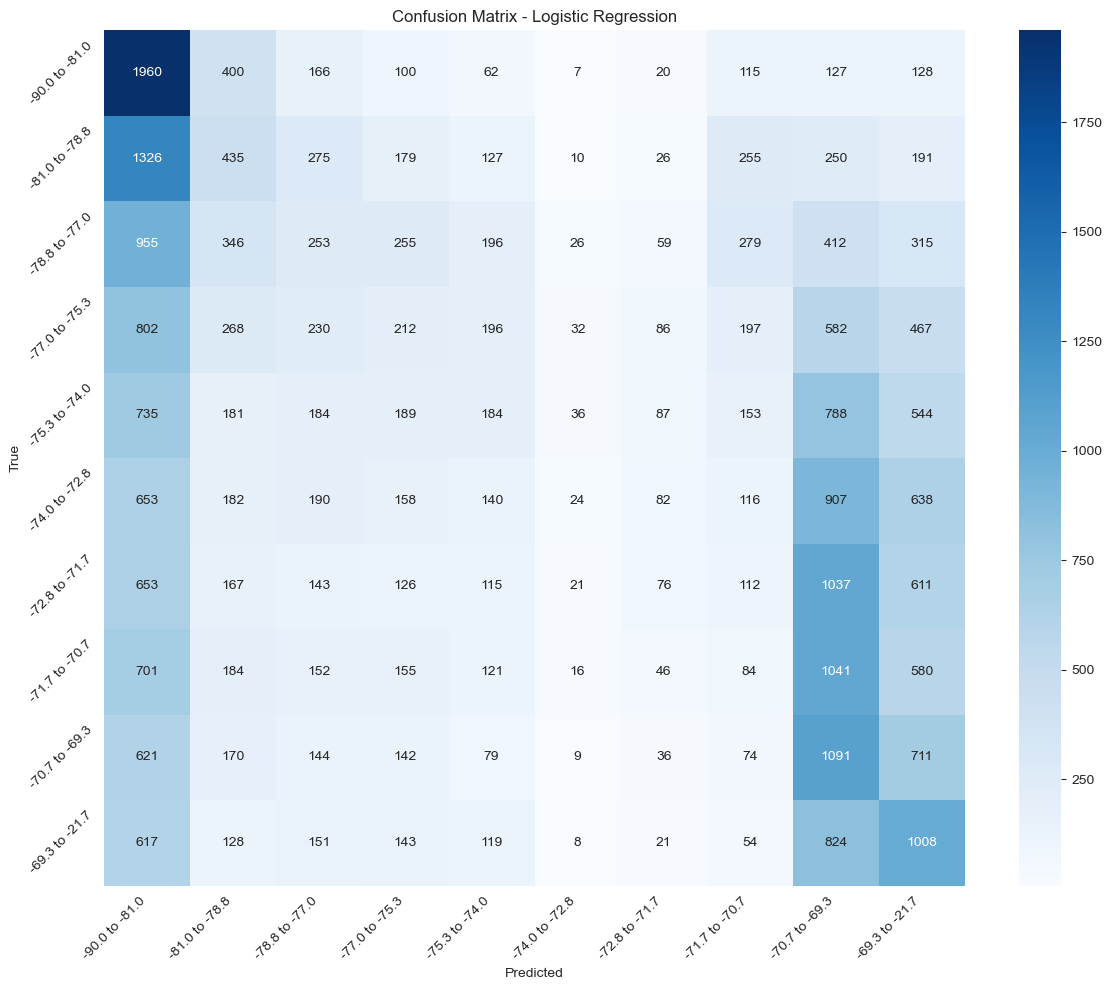

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -81.0       0.22      0.64      0.32      3085
-81.0 to -78.8       0.18      0.14      0.16      3074
-78.8 to -77.0       0.13      0.08      0.10      3096
-77.0 to -75.3       0.13      0.07      0.09      3072
-75.3 to -74.0       0.14      0.06      0.08      3081
-74.0 to -72.8       0.13      0.01      0.01      3090
-72.8 to -71.7       0.14      0.02      0.04      3061
-71.7 to -70.7       0.06      0.03      0.04      3080
-70.7 to -69.3       0.15      0.35      0.22      3077
-69.3 to -21.7       0.19      0.33      0.24      3073

      accuracy                           0.17     30789
     macro avg       0.15      0.17      0.13     30789
  weighted avg       0.15      0.17      0.13     30789


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


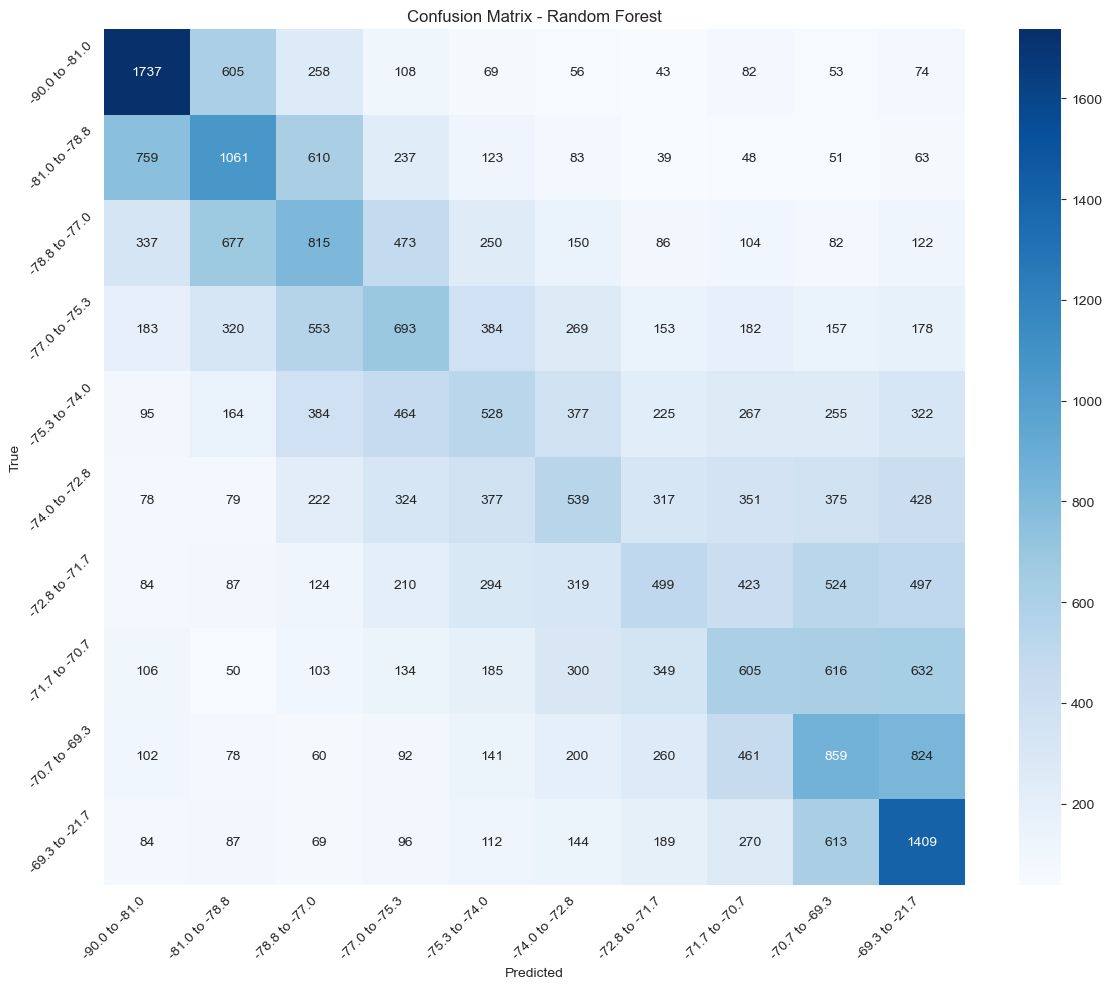

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -81.0       0.49      0.56      0.52      3085
-81.0 to -78.8       0.33      0.35      0.34      3074
-78.8 to -77.0       0.25      0.26      0.26      3096
-77.0 to -75.3       0.24      0.23      0.23      3072
-75.3 to -74.0       0.21      0.17      0.19      3081
-74.0 to -72.8       0.22      0.17      0.20      3090
-72.8 to -71.7       0.23      0.16      0.19      3061
-71.7 to -70.7       0.22      0.20      0.21      3080
-70.7 to -69.3       0.24      0.28      0.26      3077
-69.3 to -21.7       0.31      0.46      0.37      3073

      accuracy                           0.28     30789
     macro avg       0.28      0.28      0.28     30789
  weighted avg       0.28      0.28      0.28     30789


Training KNN...


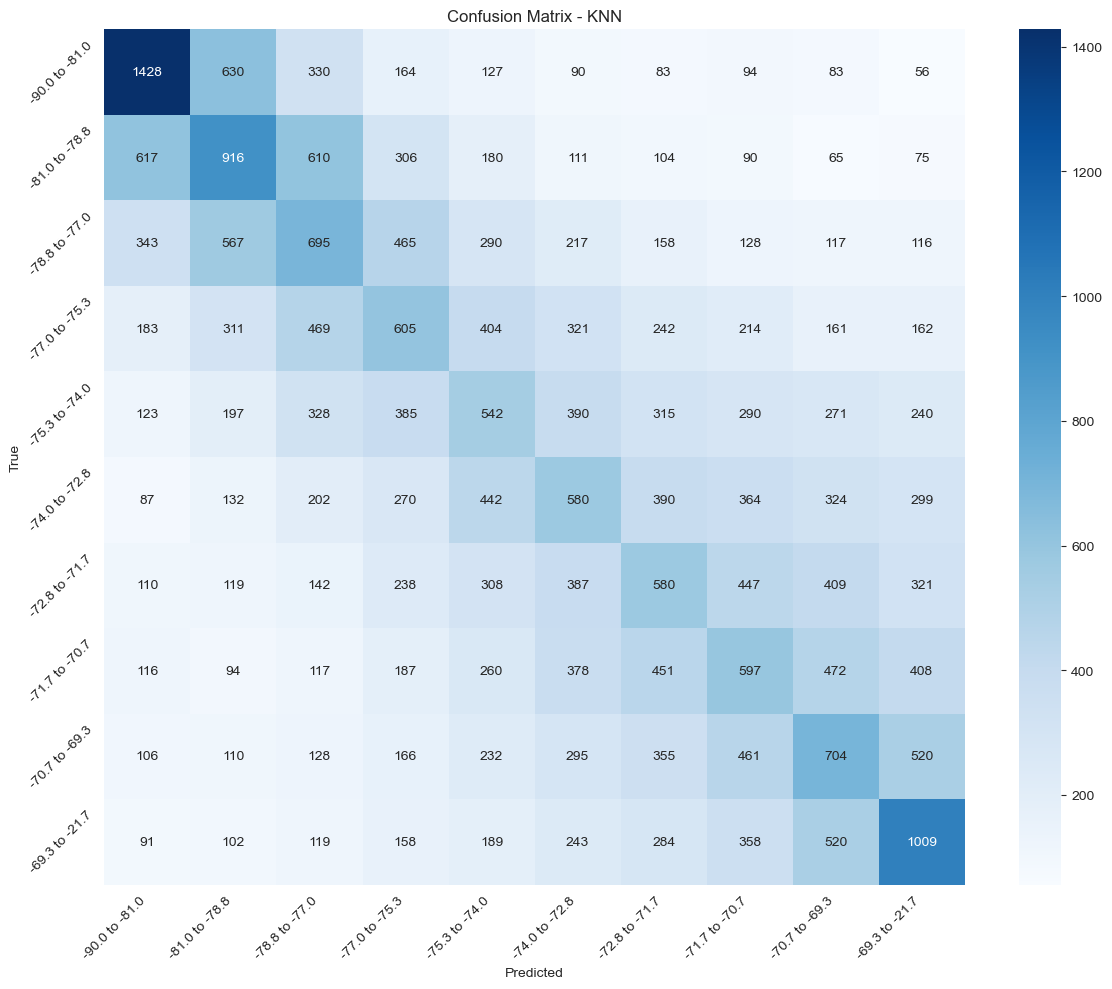

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -81.0       0.45      0.46      0.45      3085
-81.0 to -78.8       0.29      0.30      0.29      3074
-78.8 to -77.0       0.22      0.22      0.22      3096
-77.0 to -75.3       0.21      0.20      0.20      3072
-75.3 to -74.0       0.18      0.18      0.18      3081
-74.0 to -72.8       0.19      0.19      0.19      3090
-72.8 to -71.7       0.20      0.19      0.19      3061
-71.7 to -70.7       0.20      0.19      0.20      3080
-70.7 to -69.3       0.23      0.23      0.23      3077
-69.3 to -21.7       0.31      0.33      0.32      3073

      accuracy                           0.25     30789
     macro avg       0.25      0.25      0.25     30789
  weighted avg       0.25      0.25      0.25     30789


Training Decision Tree...


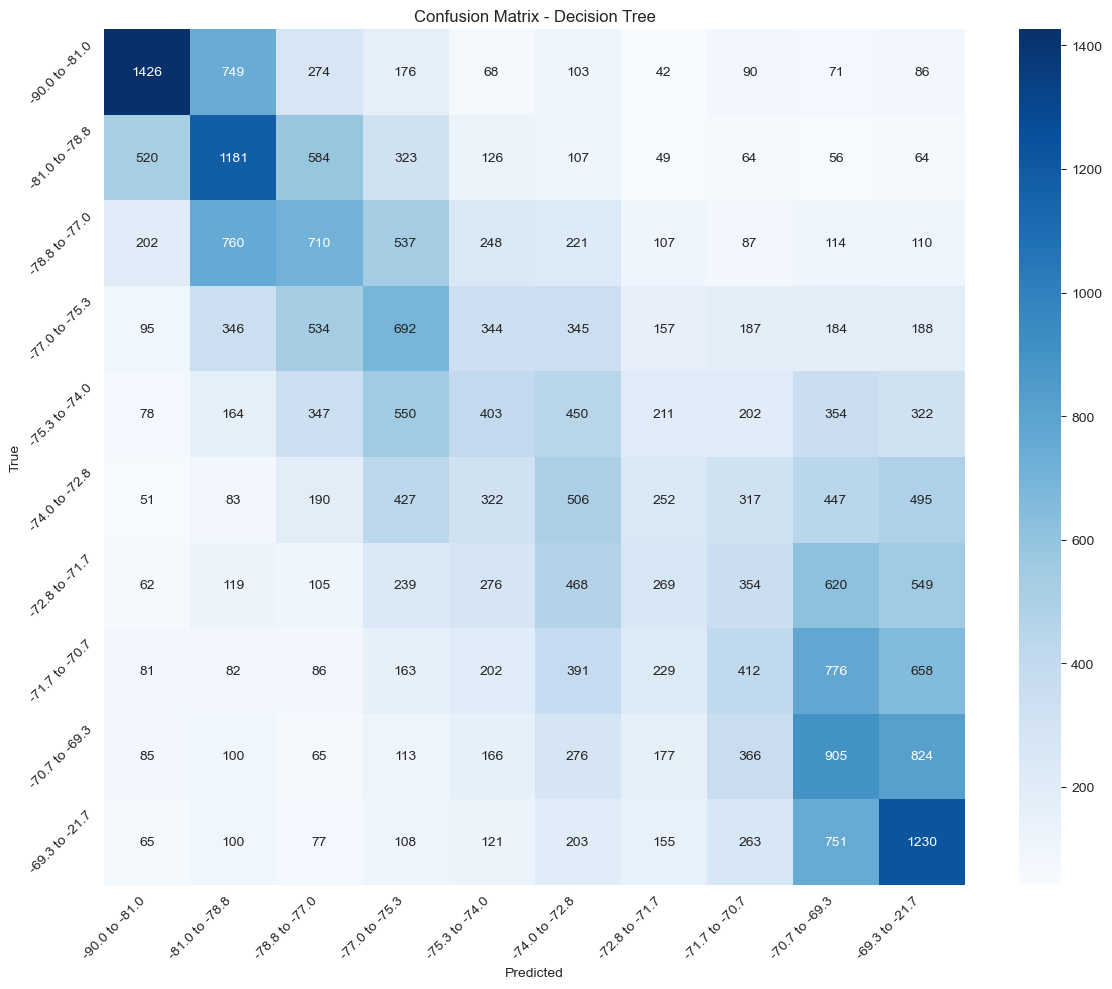

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -81.0       0.54      0.46      0.50      3085
-81.0 to -78.8       0.32      0.38      0.35      3074
-78.8 to -77.0       0.24      0.23      0.23      3096
-77.0 to -75.3       0.21      0.23      0.22      3072
-75.3 to -74.0       0.18      0.13      0.15      3081
-74.0 to -72.8       0.16      0.16      0.16      3090
-72.8 to -71.7       0.16      0.09      0.11      3061
-71.7 to -70.7       0.18      0.13      0.15      3080
-70.7 to -69.3       0.21      0.29      0.25      3077
-69.3 to -21.7       0.27      0.40      0.32      3073

      accuracy                           0.25     30789
     macro avg       0.25      0.25      0.24     30789
  weighted avg       0.25      0.25      0.24     30789


Training Neural Network...
Epoch 1/100
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1784 - loss: 2.

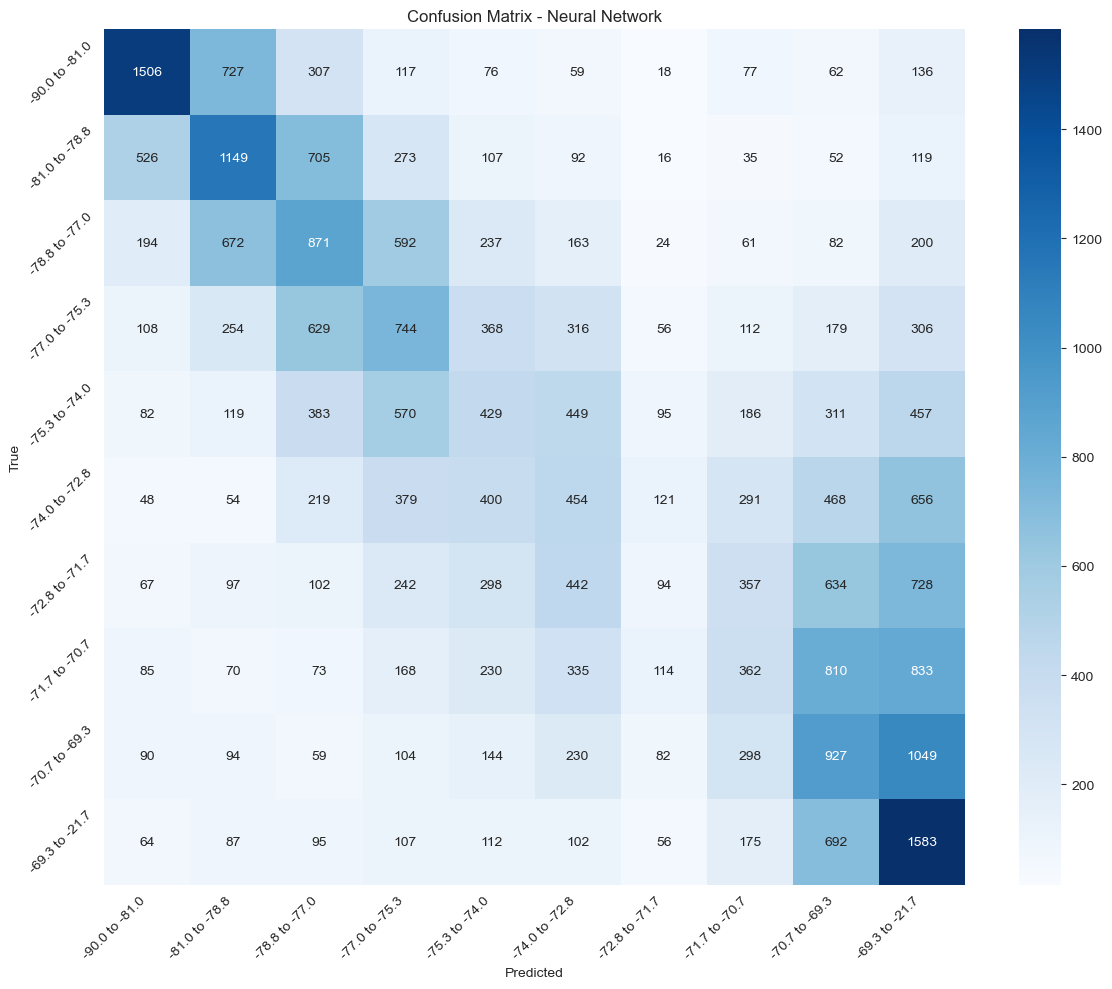


Neural Network Classification Report:
                precision    recall  f1-score   support

-90.0 to -81.0       0.54      0.49      0.51      3085
-81.0 to -78.8       0.35      0.37      0.36      3074
-78.8 to -77.0       0.25      0.28      0.27      3096
-77.0 to -75.3       0.23      0.24      0.23      3072
-75.3 to -74.0       0.18      0.14      0.16      3081
-74.0 to -72.8       0.17      0.15      0.16      3090
-72.8 to -71.7       0.14      0.03      0.05      3061
-71.7 to -70.7       0.19      0.12      0.14      3080
-70.7 to -69.3       0.22      0.30      0.25      3077
-69.3 to -21.7       0.26      0.52      0.35      3073

      accuracy                           0.26     30789
     macro avg       0.25      0.26      0.25     30789
  weighted avg       0.25      0.26      0.25     30789



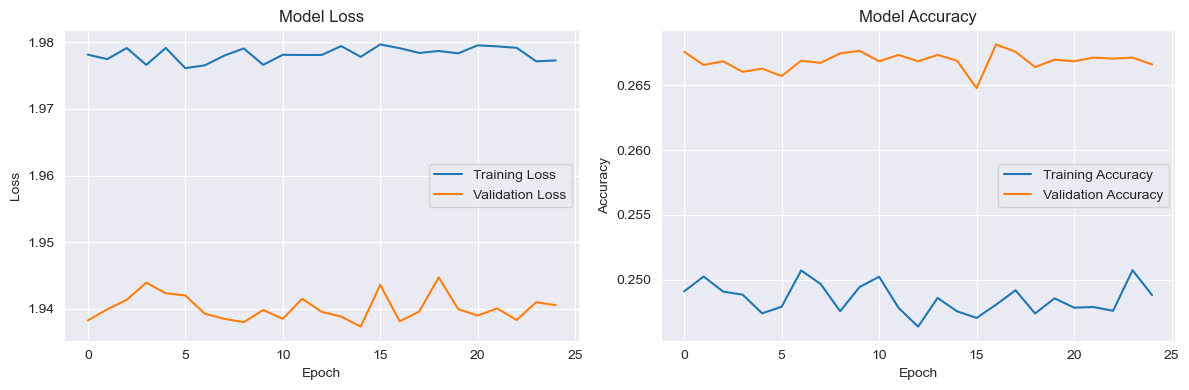

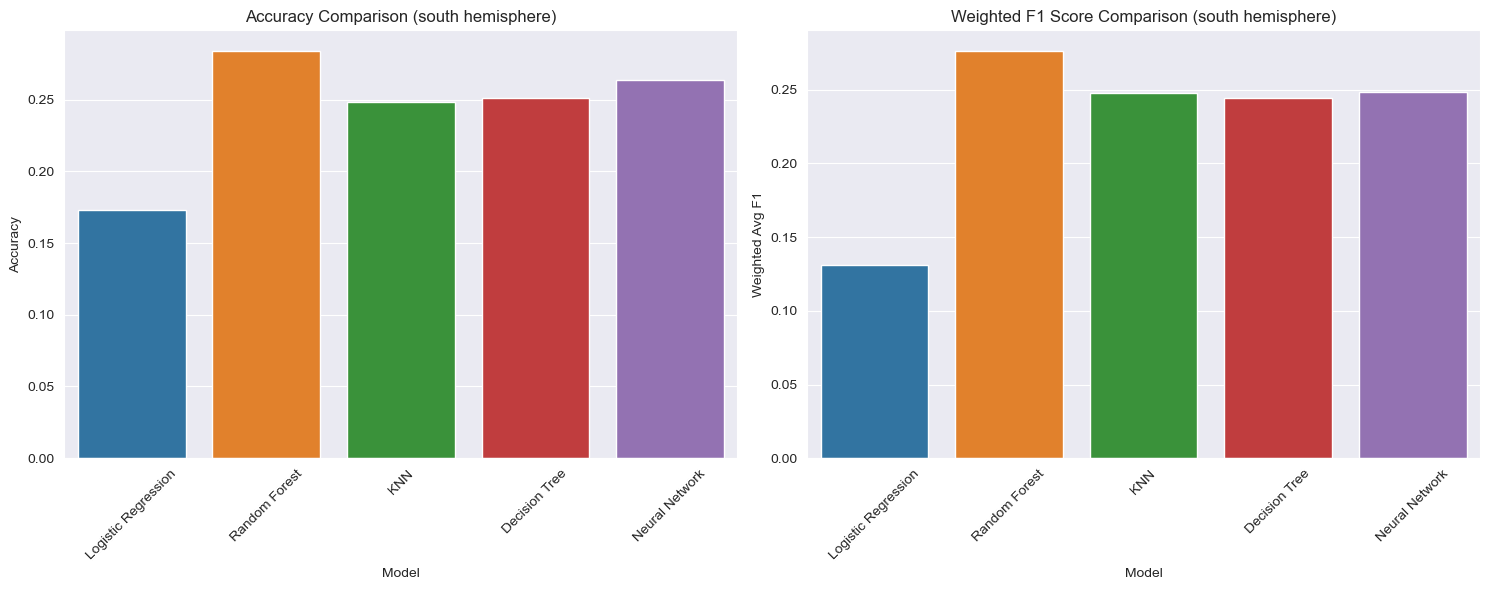


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.173016      0.130854         0.130857
1        Random Forest  0.284030      0.276427         0.276460
2                  KNN  0.248660      0.247628         0.247650
3        Decision Tree  0.251194      0.244656         0.244711
4       Neural Network  0.263698      0.248335         0.248437


In [20]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(
    nightsideN_df, 'north', n_bins=10
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(
    nightsideS_df, 'south', n_bins=10
)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


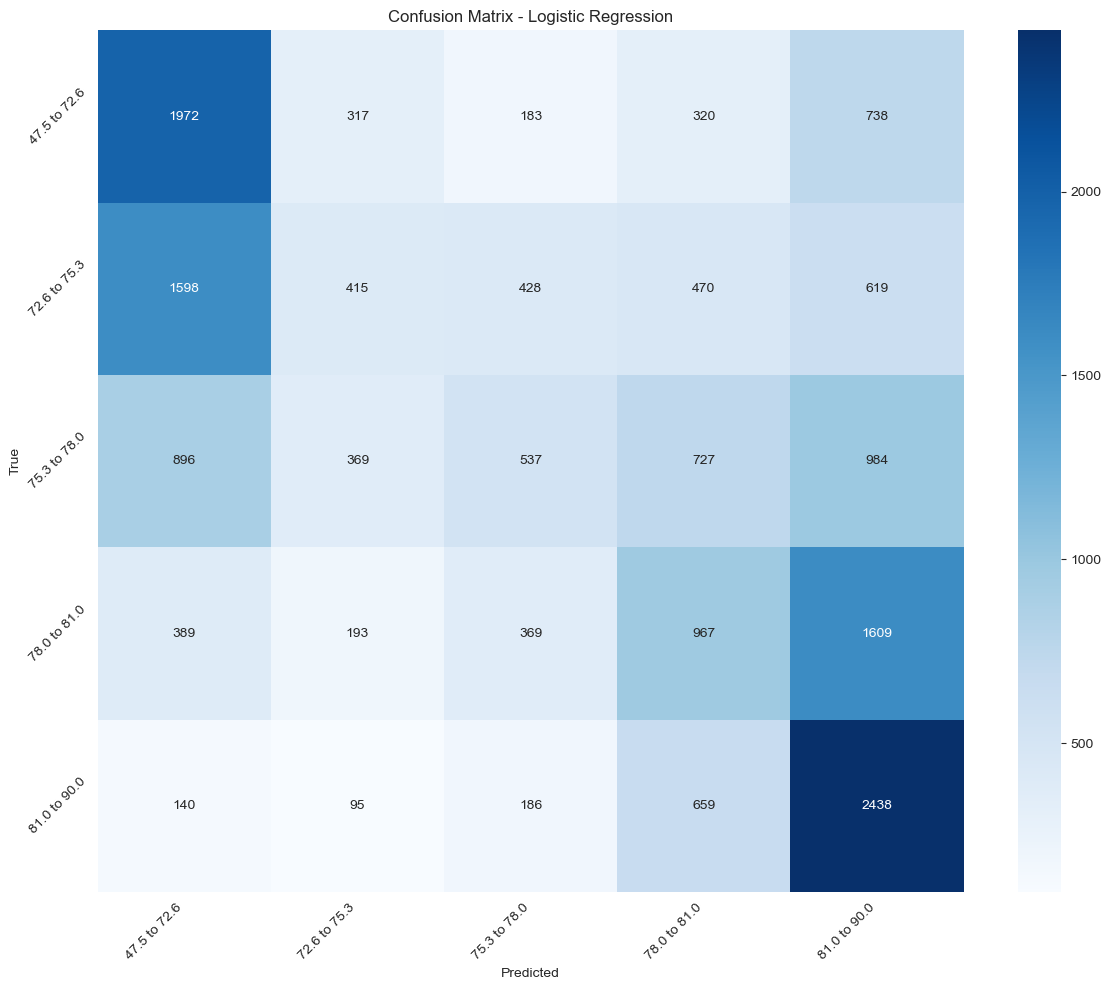

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 72.6       0.39      0.56      0.46      3530
72.6 to 75.3       0.30      0.12      0.17      3530
75.3 to 78.0       0.32      0.15      0.21      3513
78.0 to 81.0       0.31      0.27      0.29      3527
81.0 to 90.0       0.38      0.69      0.49      3518

    accuracy                           0.36     17618
   macro avg       0.34      0.36      0.32     17618
weighted avg       0.34      0.36      0.32     17618


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


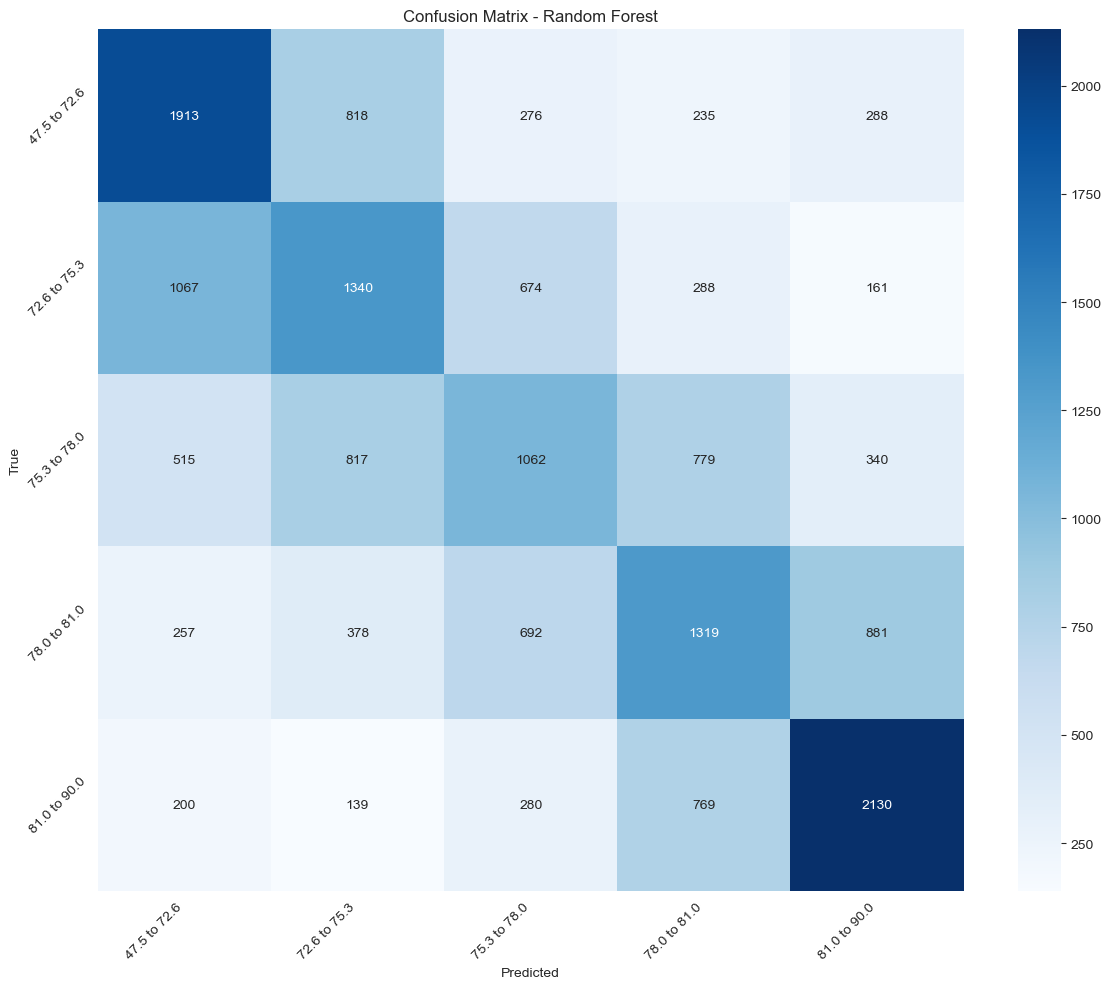

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

47.5 to 72.6       0.48      0.54      0.51      3530
72.6 to 75.3       0.38      0.38      0.38      3530
75.3 to 78.0       0.36      0.30      0.33      3513
78.0 to 81.0       0.39      0.37      0.38      3527
81.0 to 90.0       0.56      0.61      0.58      3518

    accuracy                           0.44     17618
   macro avg       0.43      0.44      0.44     17618
weighted avg       0.43      0.44      0.44     17618


Training KNN...


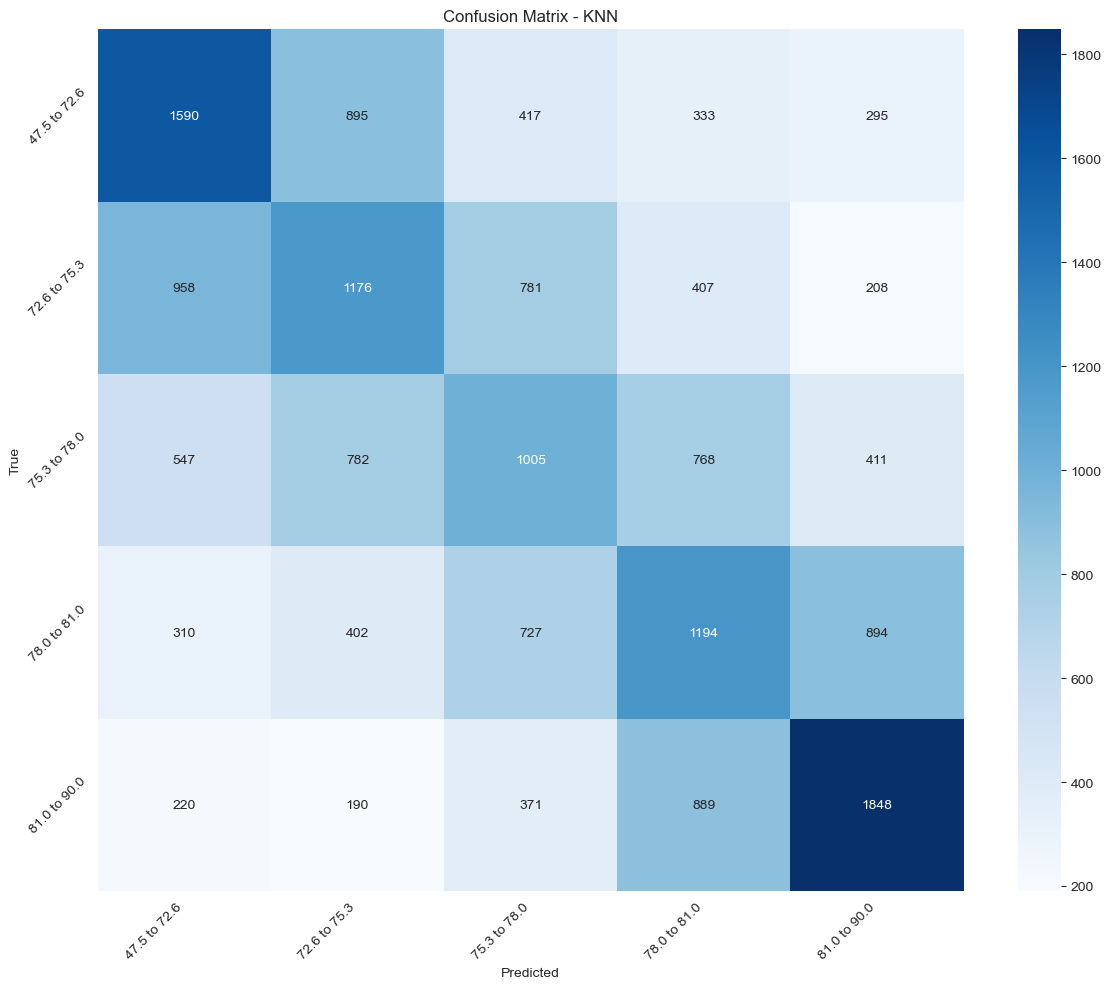

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 72.6       0.44      0.45      0.44      3530
72.6 to 75.3       0.34      0.33      0.34      3530
75.3 to 78.0       0.30      0.29      0.29      3513
78.0 to 81.0       0.33      0.34      0.34      3527
81.0 to 90.0       0.51      0.53      0.52      3518

    accuracy                           0.39     17618
   macro avg       0.38      0.39      0.39     17618
weighted avg       0.38      0.39      0.39     17618


Training Decision Tree...


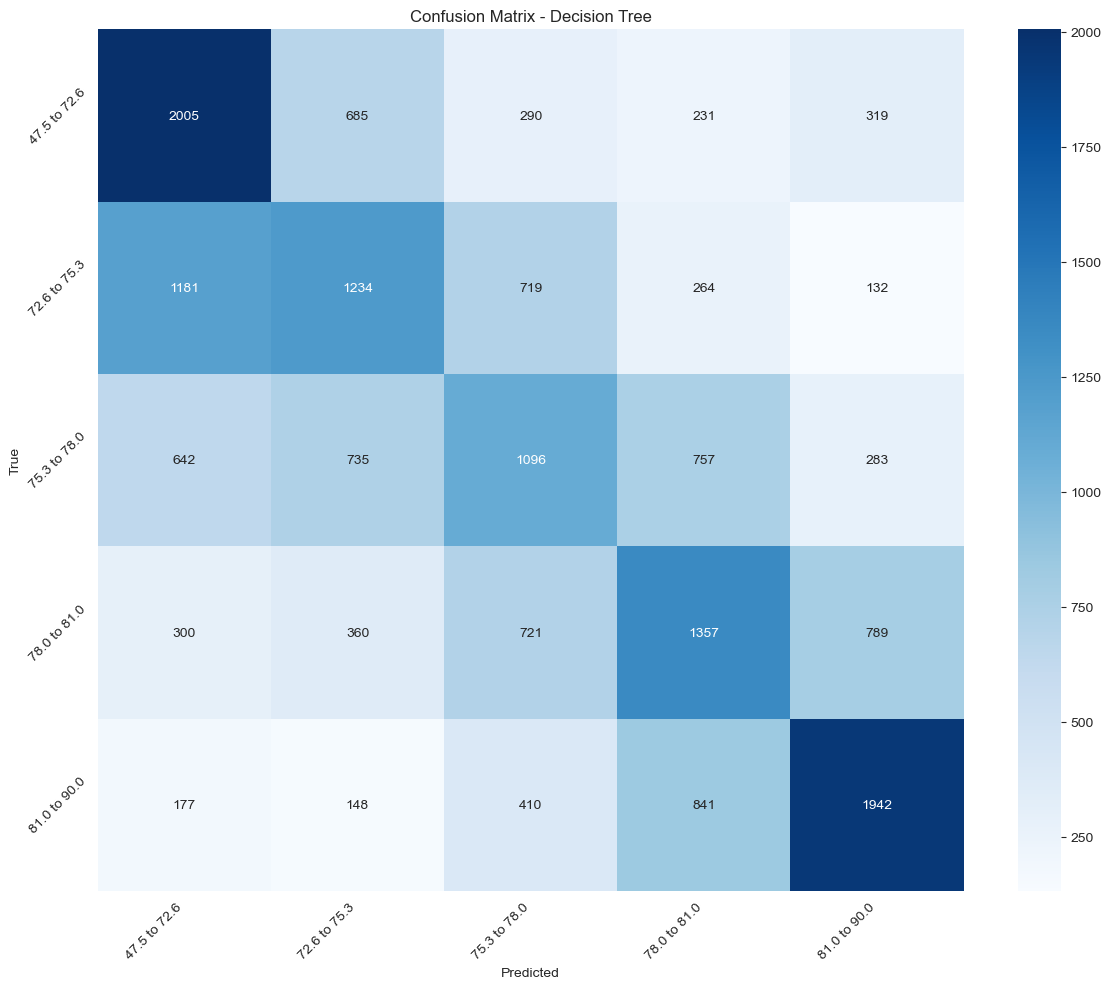

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

47.5 to 72.6       0.47      0.57      0.51      3530
72.6 to 75.3       0.39      0.35      0.37      3530
75.3 to 78.0       0.34      0.31      0.32      3513
78.0 to 81.0       0.39      0.38      0.39      3527
81.0 to 90.0       0.56      0.55      0.56      3518

    accuracy                           0.43     17618
   macro avg       0.43      0.43      0.43     17618
weighted avg       0.43      0.43      0.43     17618


Training Neural Network...
Epoch 1/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3357 - loss: 1.5561 - val_accuracy: 0.4083 - val_loss: 1.3830 - learning_rate: 0.0010
Epoch 2/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3826 - loss: 1.4306 - val_accuracy: 0.4067 - val_loss: 1.3701 - learning_rate: 0.0010
Epoch 3/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.380

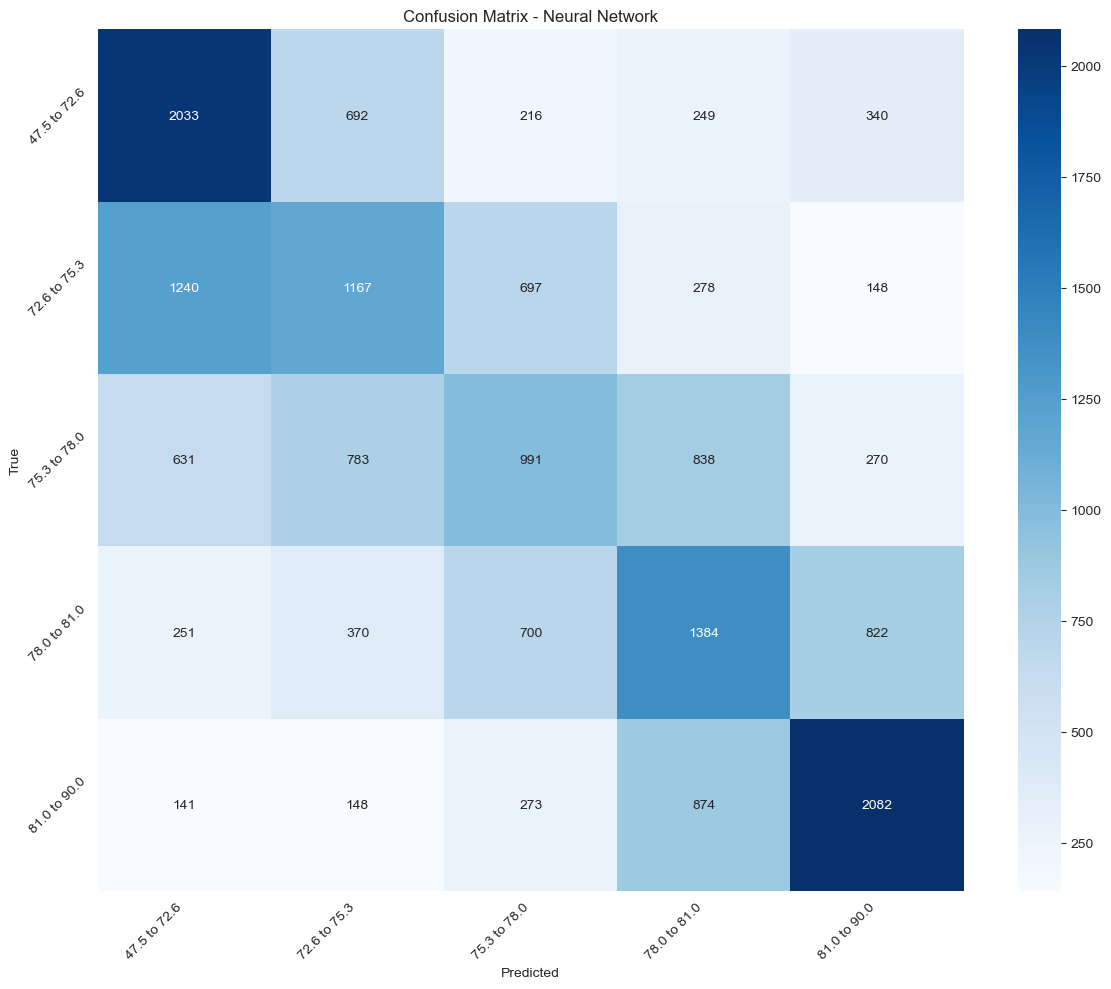


Neural Network Classification Report:
              precision    recall  f1-score   support

47.5 to 72.6       0.47      0.58      0.52      3530
72.6 to 75.3       0.37      0.33      0.35      3530
75.3 to 78.0       0.34      0.28      0.31      3513
78.0 to 81.0       0.38      0.39      0.39      3527
81.0 to 90.0       0.57      0.59      0.58      3518

    accuracy                           0.43     17618
   macro avg       0.43      0.43      0.43     17618
weighted avg       0.43      0.43      0.43     17618



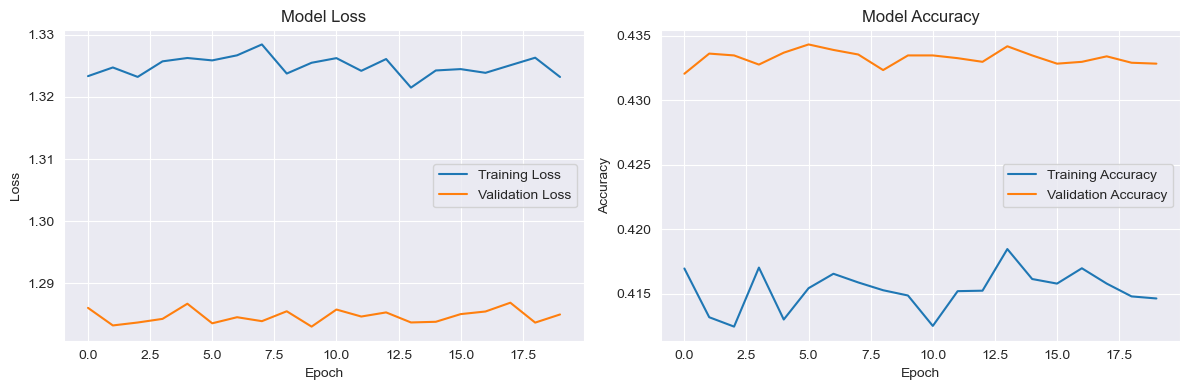

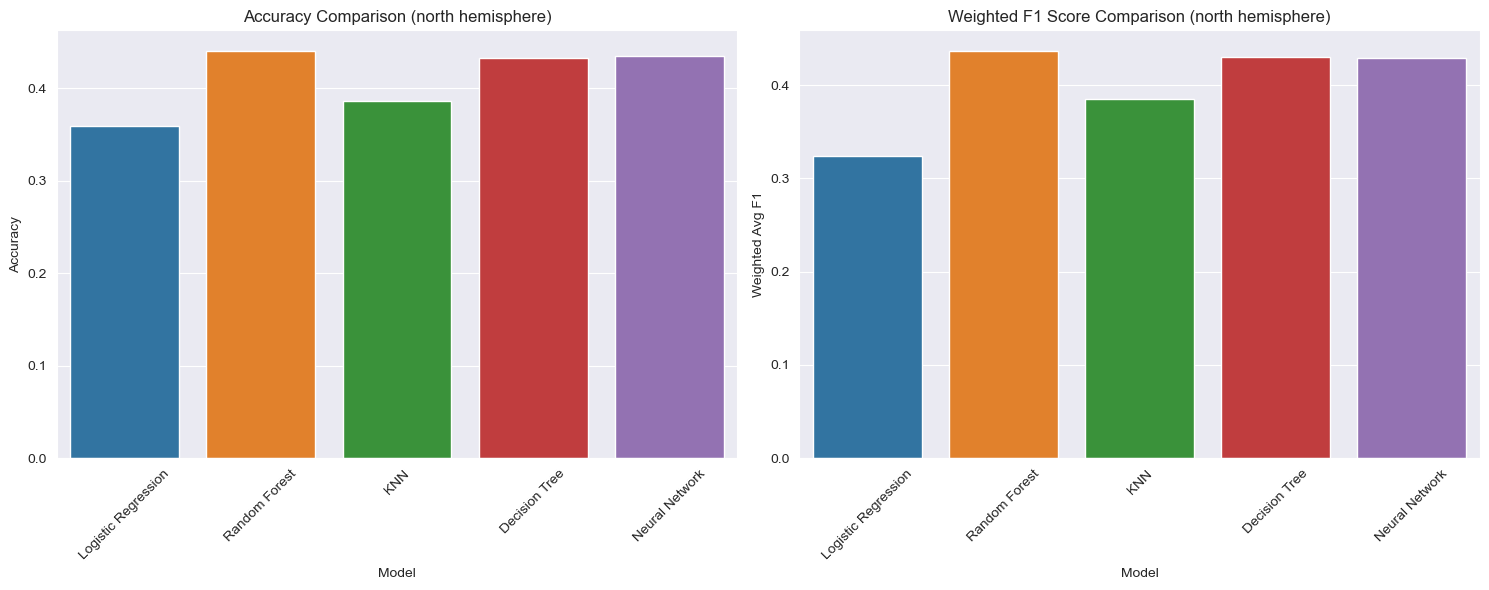


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.359235      0.323892         0.323897
1        Random Forest  0.440686      0.436689         0.436705
2                  KNN  0.386707      0.385462         0.385470
3        Decision Tree  0.433307      0.430119         0.430142
4       Neural Network  0.434612      0.429136         0.429155

Training South Hemisphere Models...

Training Logistic Regression...


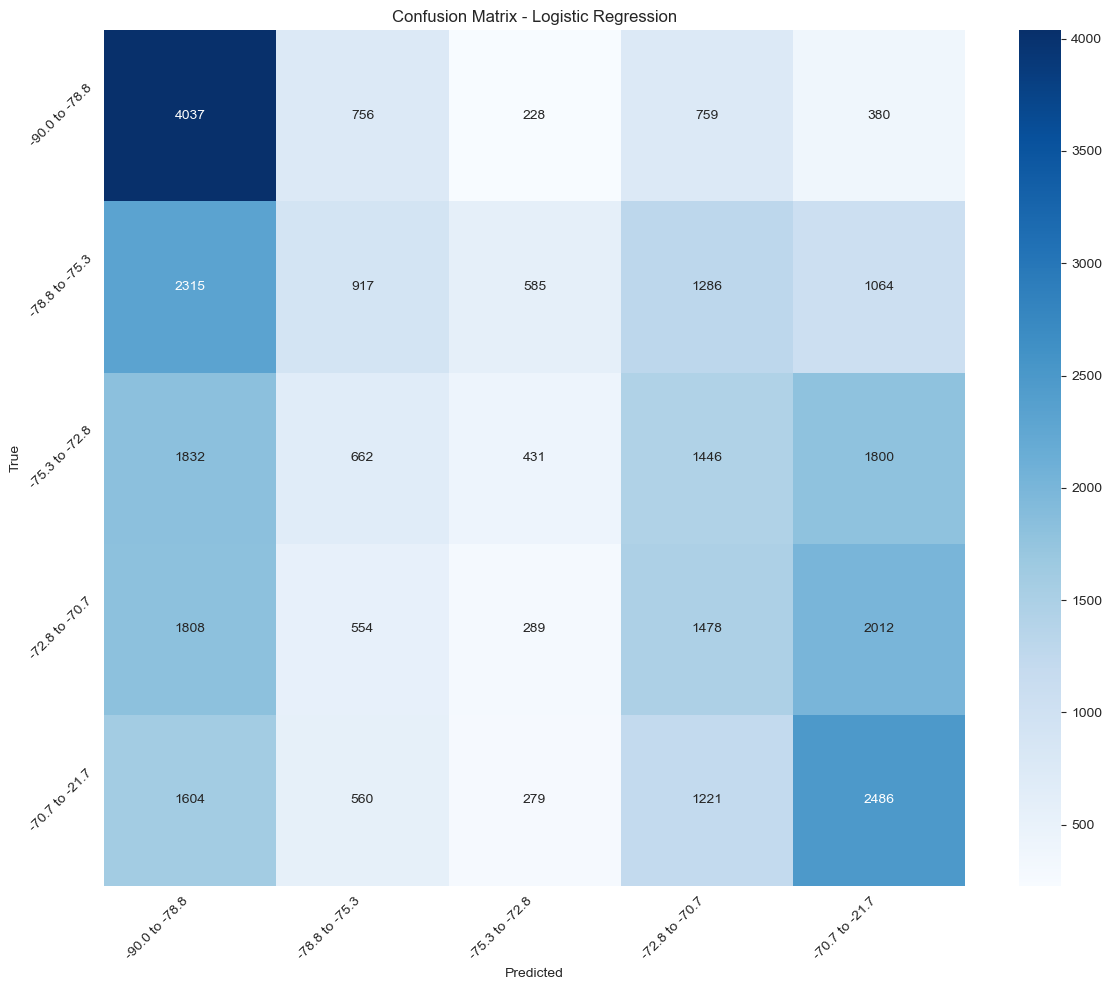

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -78.8       0.35      0.66      0.45      6160
-78.8 to -75.3       0.27      0.15      0.19      6167
-75.3 to -72.8       0.24      0.07      0.11      6171
-72.8 to -70.7       0.24      0.24      0.24      6141
-70.7 to -21.7       0.32      0.40      0.36      6150

      accuracy                           0.30     30789
     macro avg       0.28      0.30      0.27     30789
  weighted avg       0.28      0.30      0.27     30789


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


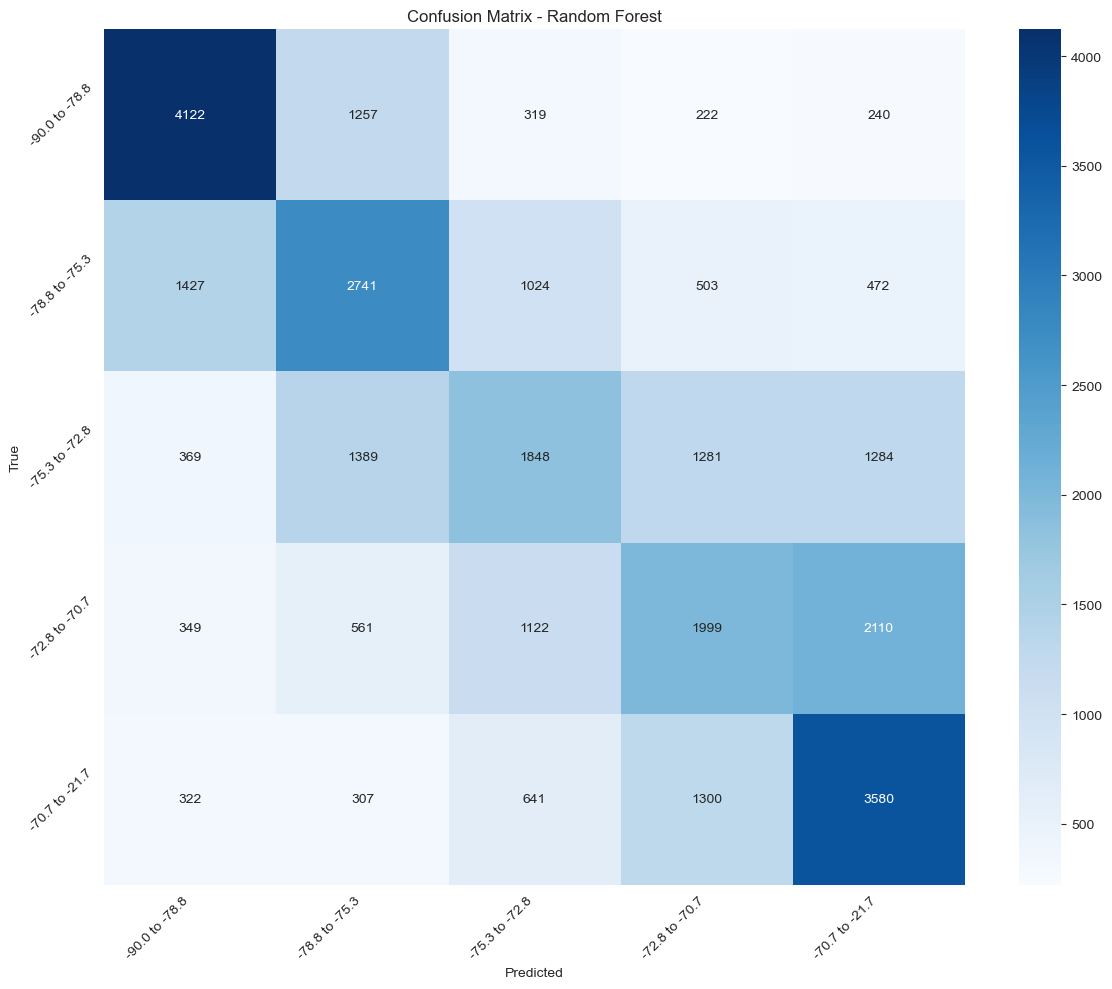

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -78.8       0.63      0.67      0.65      6160
-78.8 to -75.3       0.44      0.44      0.44      6167
-75.3 to -72.8       0.37      0.30      0.33      6171
-72.8 to -70.7       0.38      0.33      0.35      6141
-70.7 to -21.7       0.47      0.58      0.52      6150

      accuracy                           0.46     30789
     macro avg       0.46      0.46      0.46     30789
  weighted avg       0.46      0.46      0.46     30789


Training KNN...


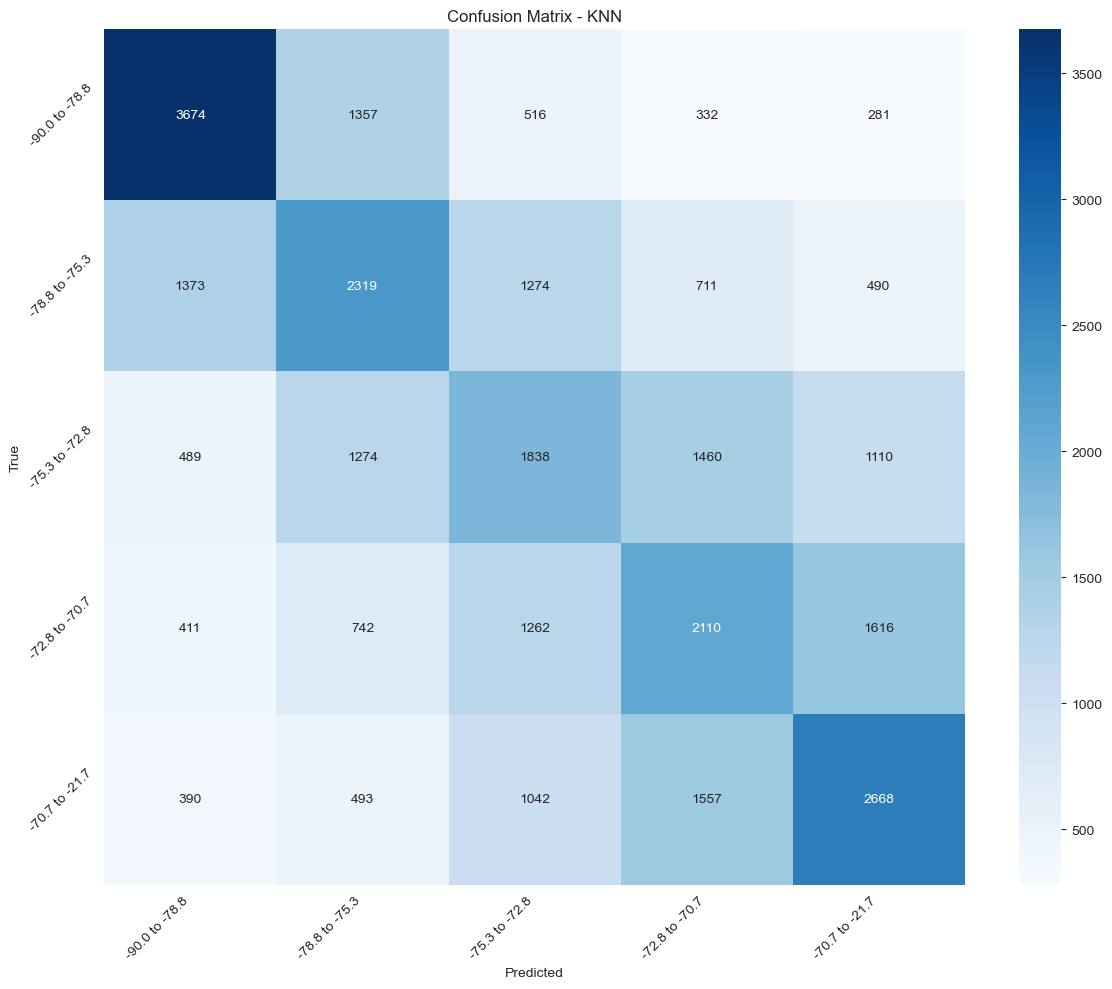

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -78.8       0.58      0.60      0.59      6160
-78.8 to -75.3       0.37      0.38      0.38      6167
-75.3 to -72.8       0.31      0.30      0.30      6171
-72.8 to -70.7       0.34      0.34      0.34      6141
-70.7 to -21.7       0.43      0.43      0.43      6150

      accuracy                           0.41     30789
     macro avg       0.41      0.41      0.41     30789
  weighted avg       0.41      0.41      0.41     30789


Training Decision Tree...


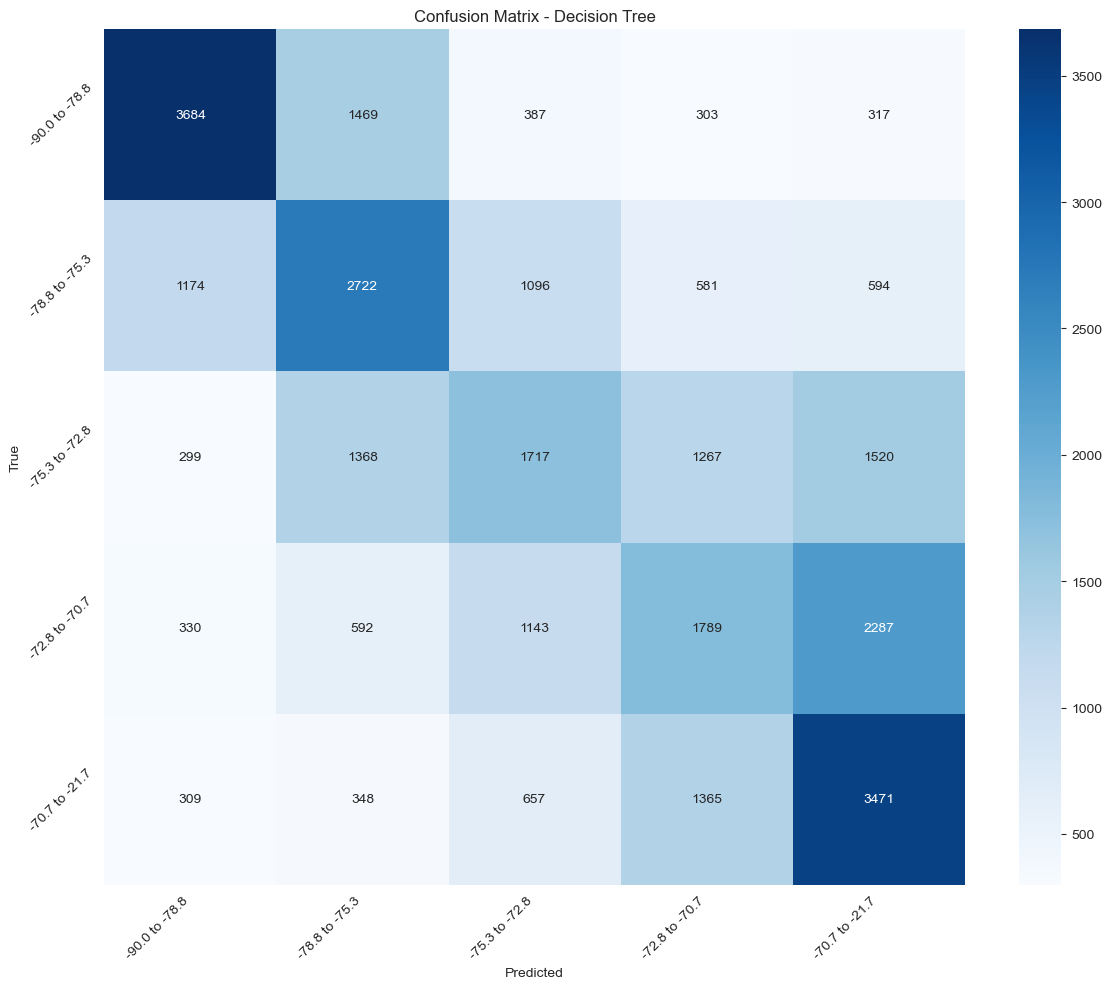

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -78.8       0.64      0.60      0.62      6160
-78.8 to -75.3       0.42      0.44      0.43      6167
-75.3 to -72.8       0.34      0.28      0.31      6171
-72.8 to -70.7       0.34      0.29      0.31      6141
-70.7 to -21.7       0.42      0.56      0.48      6150

      accuracy                           0.43     30789
     macro avg       0.43      0.43      0.43     30789
  weighted avg       0.43      0.43      0.43     30789


Training Neural Network...
Epoch 1/100
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3305 - loss: 1.5631 - val_accuracy: 0.4272 - val_loss: 1.3668 - learning_rate: 0.0010
Epoch 2/100
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3907 - loss: 1.4100 - val_accuracy: 0.4221 - val_loss: 1.3401 - learning_rate: 0.0010
Epoch 3/100
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step

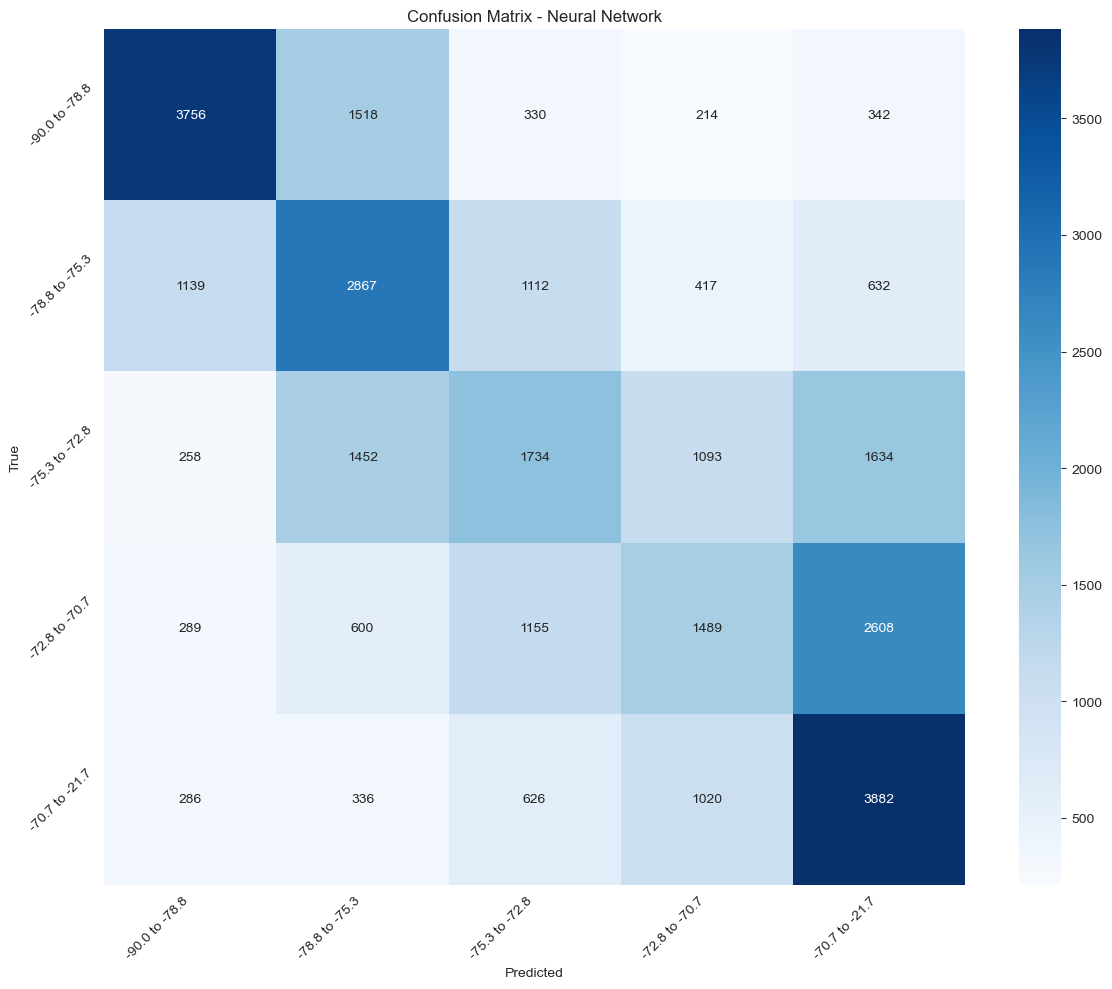


Neural Network Classification Report:
                precision    recall  f1-score   support

-90.0 to -78.8       0.66      0.61      0.63      6160
-78.8 to -75.3       0.42      0.46      0.44      6167
-75.3 to -72.8       0.35      0.28      0.31      6171
-72.8 to -70.7       0.35      0.24      0.29      6141
-70.7 to -21.7       0.43      0.63      0.51      6150

      accuracy                           0.45     30789
     macro avg       0.44      0.45      0.44     30789
  weighted avg       0.44      0.45      0.44     30789



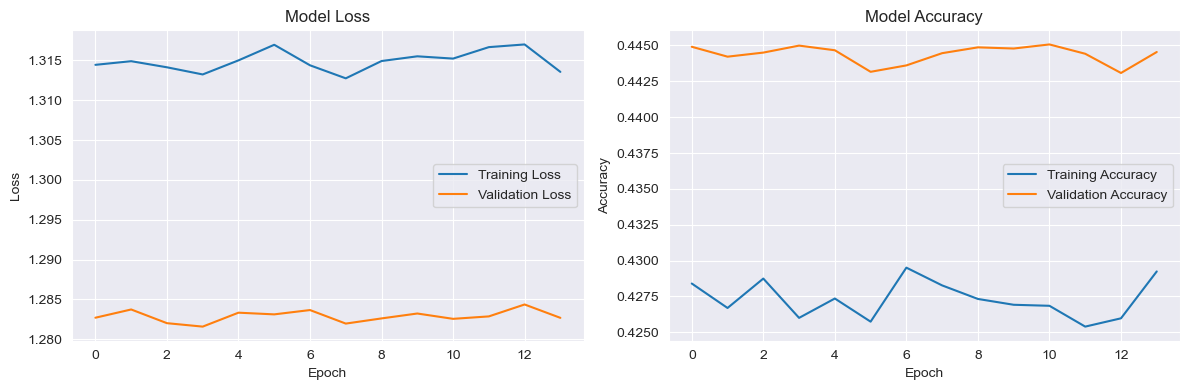

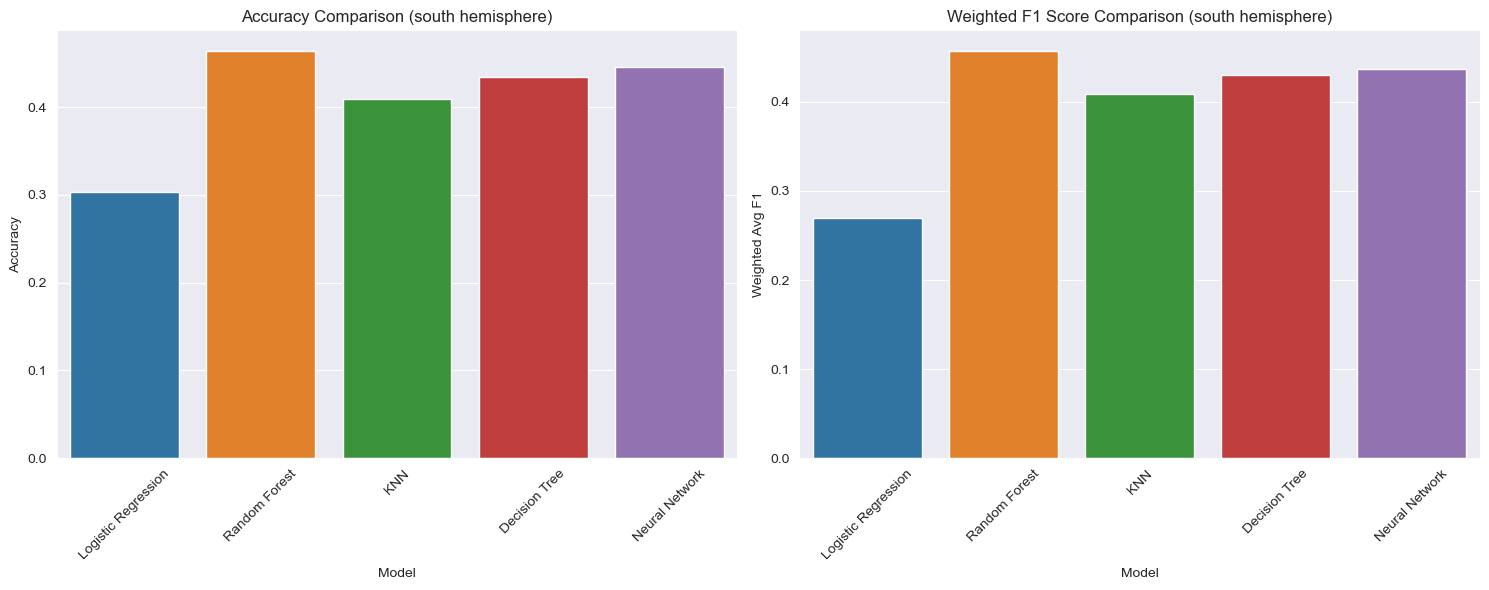


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.303647      0.270210         0.270124
1        Random Forest  0.464127      0.457392         0.457391
2                  KNN  0.409529      0.408654         0.408641
3        Decision Tree  0.434668      0.430041         0.430052
4       Neural Network  0.445874      0.436582         0.436608


In [21]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(
    nightsideN_df, 'north', n_bins=5
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(
    nightsideS_df, 'south', n_bins=5
)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


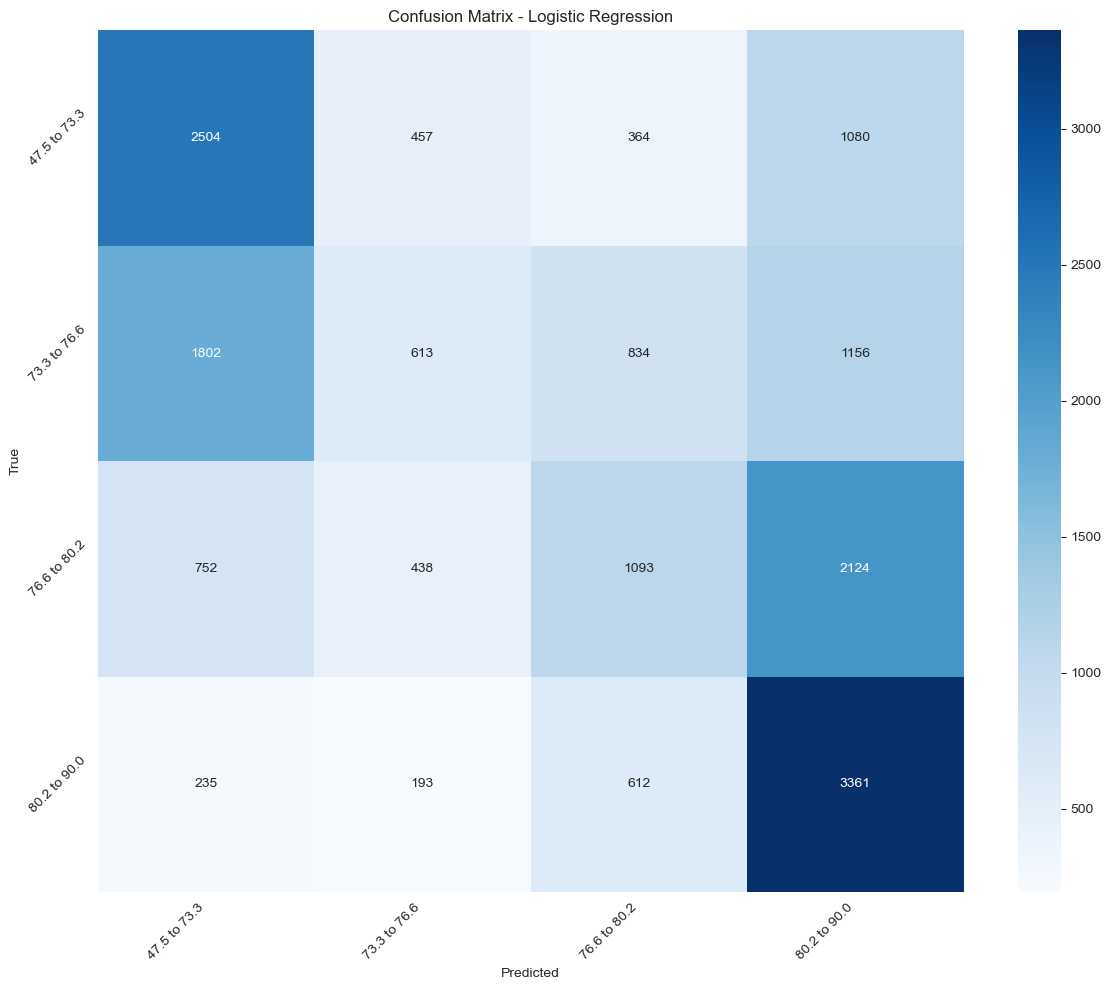

Best parameters for Logistic Regression: {'C': 10.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 73.3       0.47      0.57      0.52      4405
73.3 to 76.6       0.36      0.14      0.20      4405
76.6 to 80.2       0.38      0.25      0.30      4407
80.2 to 90.0       0.44      0.76      0.55      4401

    accuracy                           0.43     17618
   macro avg       0.41      0.43      0.39     17618
weighted avg       0.41      0.43      0.39     17618


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


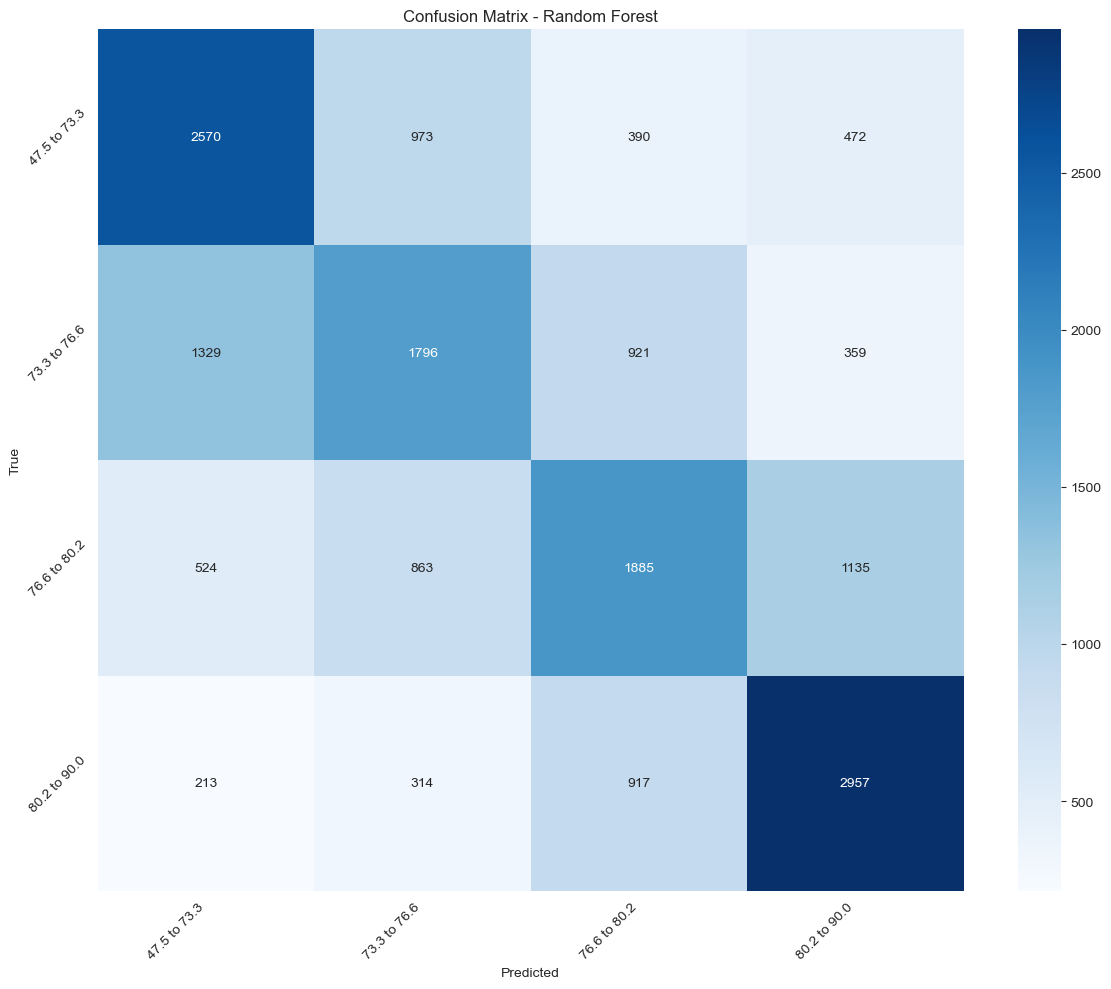

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

47.5 to 73.3       0.55      0.58      0.57      4405
73.3 to 76.6       0.46      0.41      0.43      4405
76.6 to 80.2       0.46      0.43      0.44      4407
80.2 to 90.0       0.60      0.67      0.63      4401

    accuracy                           0.52     17618
   macro avg       0.52      0.52      0.52     17618
weighted avg       0.52      0.52      0.52     17618


Training KNN...


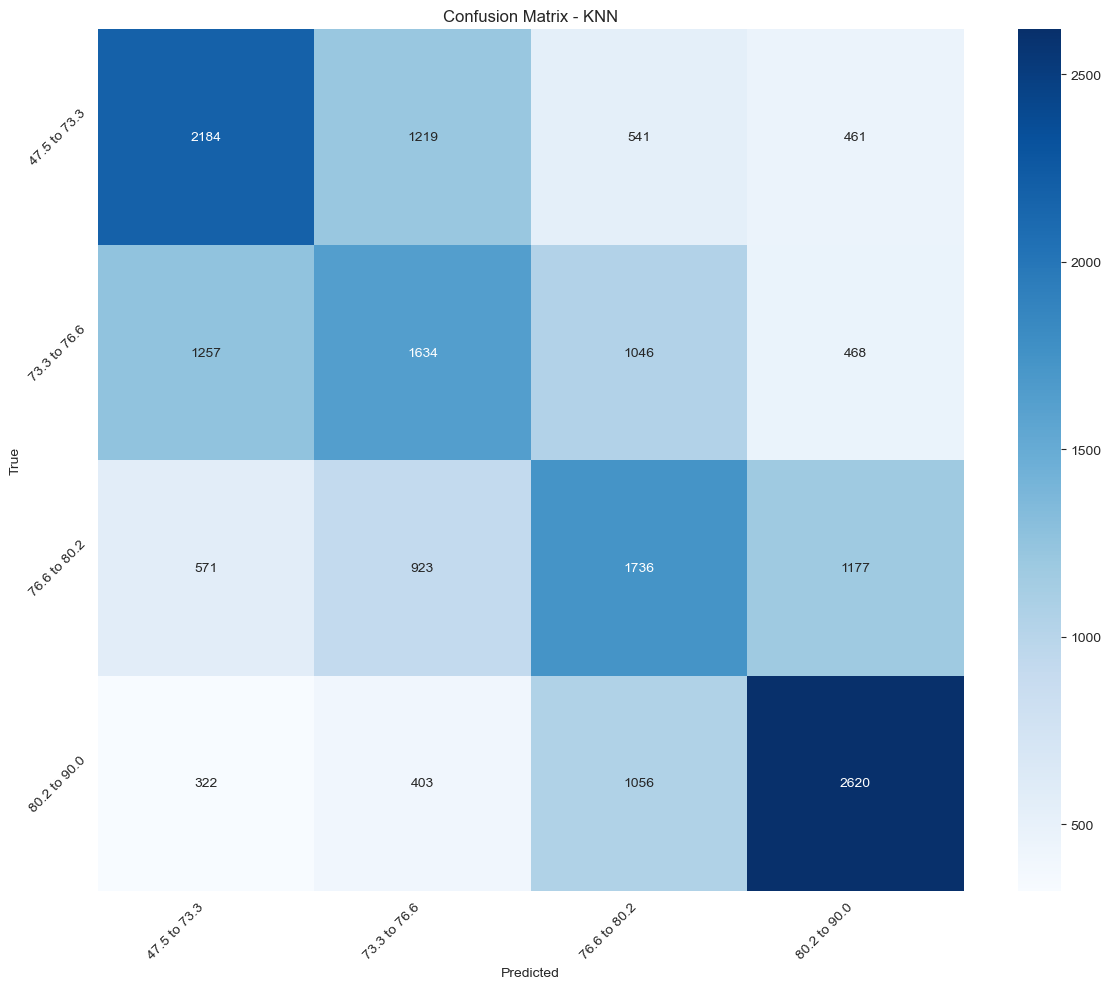

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 73.3       0.50      0.50      0.50      4405
73.3 to 76.6       0.39      0.37      0.38      4405
76.6 to 80.2       0.40      0.39      0.40      4407
80.2 to 90.0       0.55      0.60      0.57      4401

    accuracy                           0.46     17618
   macro avg       0.46      0.46      0.46     17618
weighted avg       0.46      0.46      0.46     17618


Training Decision Tree...


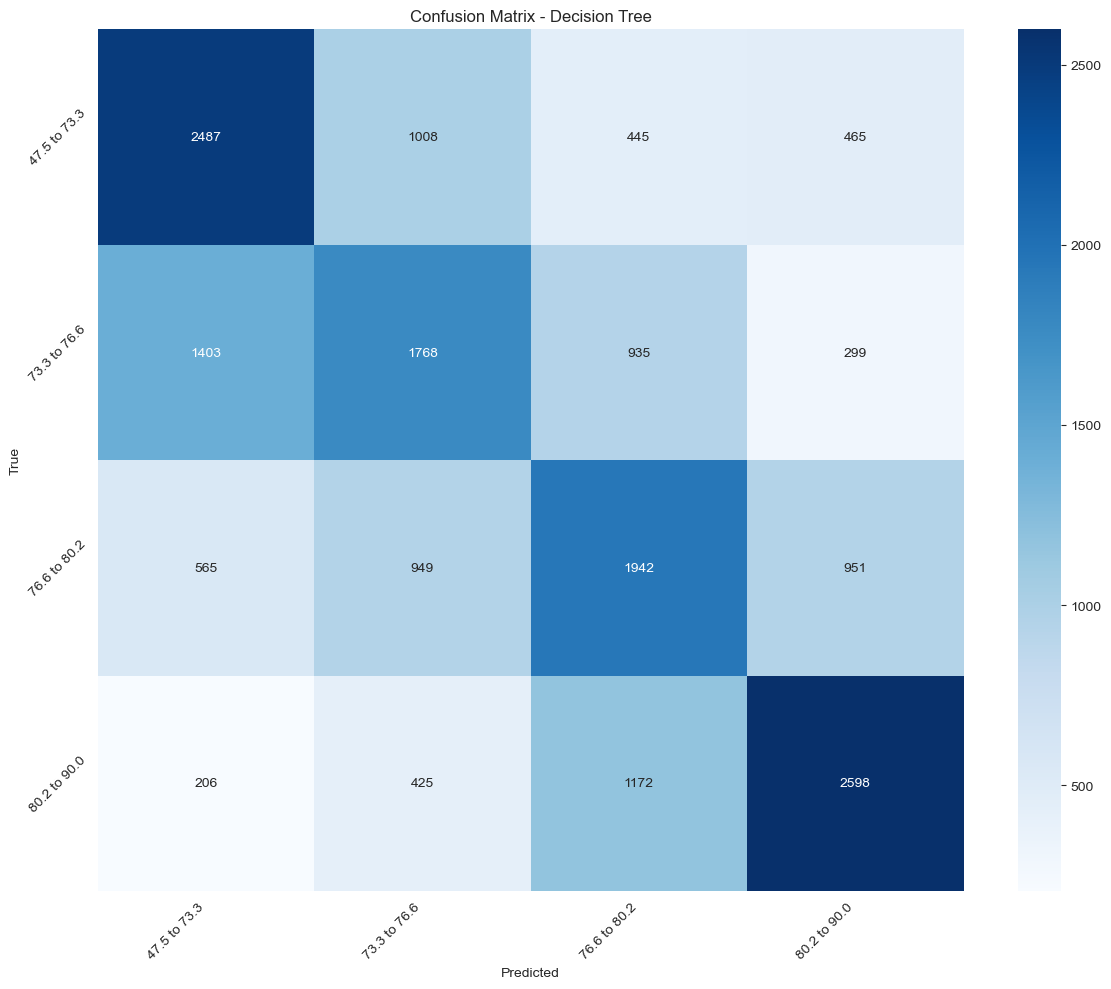

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

47.5 to 73.3       0.53      0.56      0.55      4405
73.3 to 76.6       0.43      0.40      0.41      4405
76.6 to 80.2       0.43      0.44      0.44      4407
80.2 to 90.0       0.60      0.59      0.60      4401

    accuracy                           0.50     17618
   macro avg       0.50      0.50      0.50     17618
weighted avg       0.50      0.50      0.50     17618


Training Neural Network...
Epoch 1/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4079 - loss: 1.3419 - val_accuracy: 0.4747 - val_loss: 1.1930 - learning_rate: 0.0010
Epoch 2/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4539 - loss: 1.2268 - val_accuracy: 0.4814 - val_loss: 1.1661 - learning_rate: 0.0010
Epoch 3/100
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4602 - loss: 1.2012 - val_accuracy: 0.4905 - val_loss: 1.

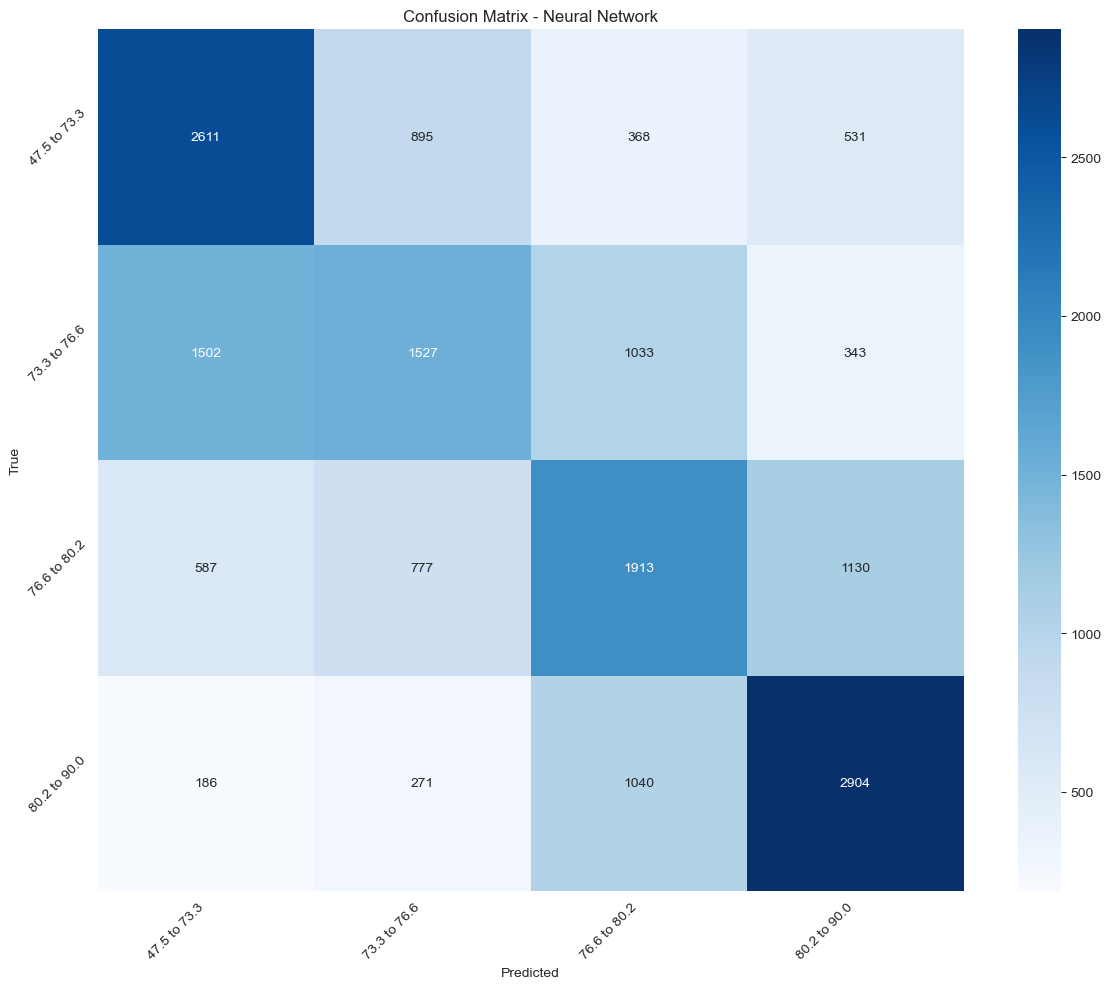


Neural Network Classification Report:
              precision    recall  f1-score   support

47.5 to 73.3       0.53      0.59      0.56      4405
73.3 to 76.6       0.44      0.35      0.39      4405
76.6 to 80.2       0.44      0.43      0.44      4407
80.2 to 90.0       0.59      0.66      0.62      4401

    accuracy                           0.51     17618
   macro avg       0.50      0.51      0.50     17618
weighted avg       0.50      0.51      0.50     17618



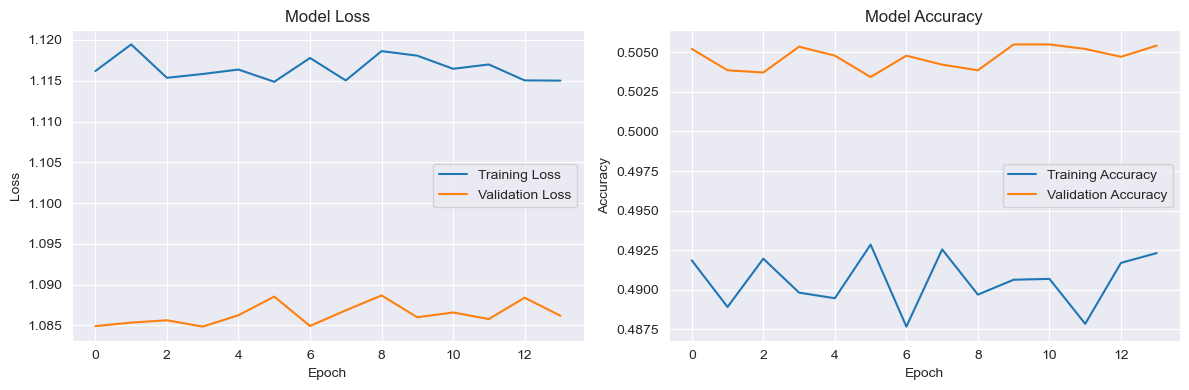

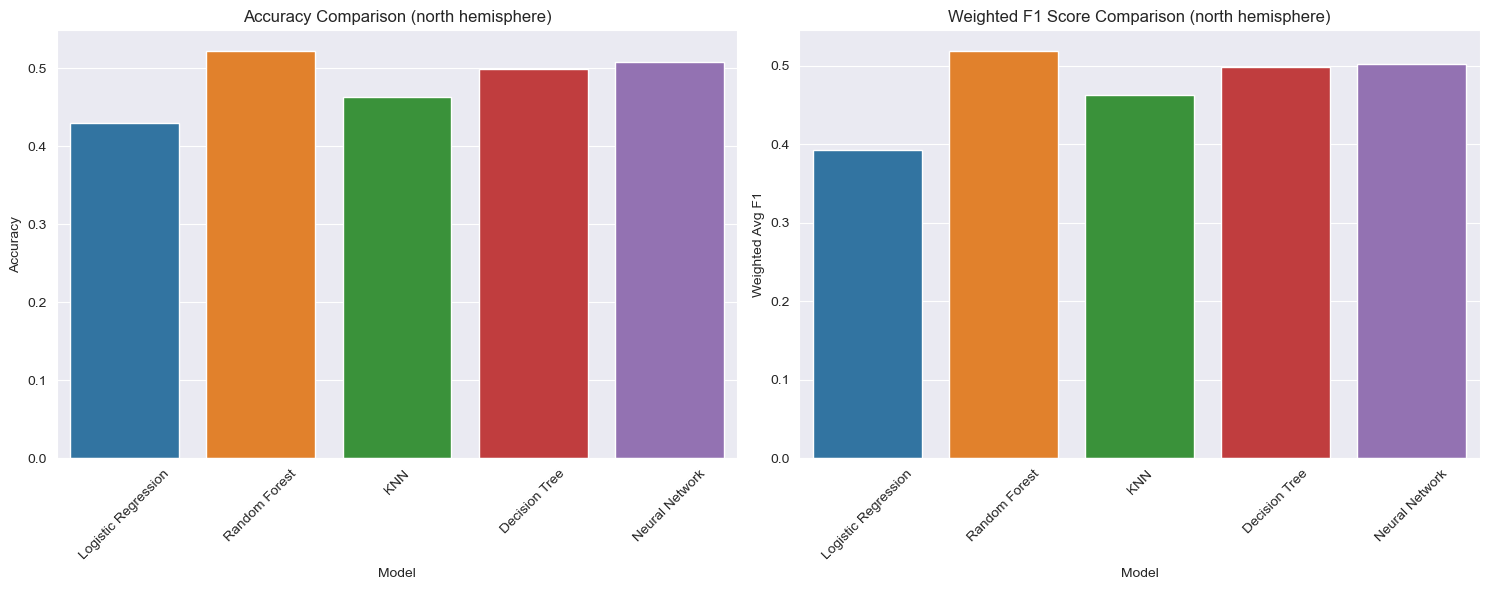


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.429731      0.392688         0.392641
1        Random Forest  0.522647      0.518854         0.518819
2                  KNN  0.463957      0.462458         0.462425
3        Decision Tree  0.499205      0.498652         0.498622
4       Neural Network  0.508287      0.502620         0.502585

Training South Hemisphere Models...

Training Logistic Regression...


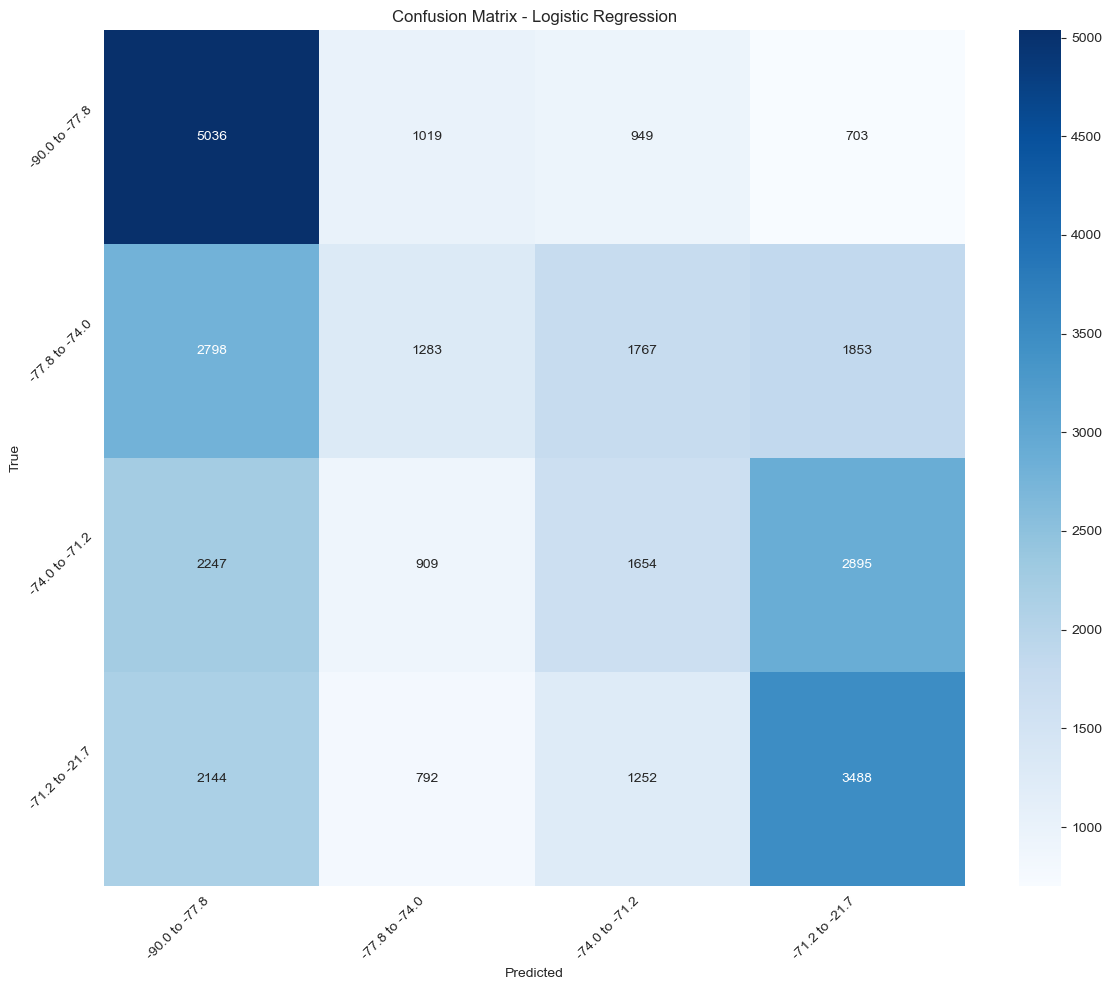

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-90.0 to -77.8       0.41      0.65      0.51      7707
-77.8 to -74.0       0.32      0.17      0.22      7701
-74.0 to -71.2       0.29      0.21      0.25      7705
-71.2 to -21.7       0.39      0.45      0.42      7676

      accuracy                           0.37     30789
     macro avg       0.35      0.37      0.35     30789
  weighted avg       0.35      0.37      0.35     30789


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(
    nightsideN_df, 'north', n_bins=4
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(
    nightsideS_df, 'south', n_bins=4
)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


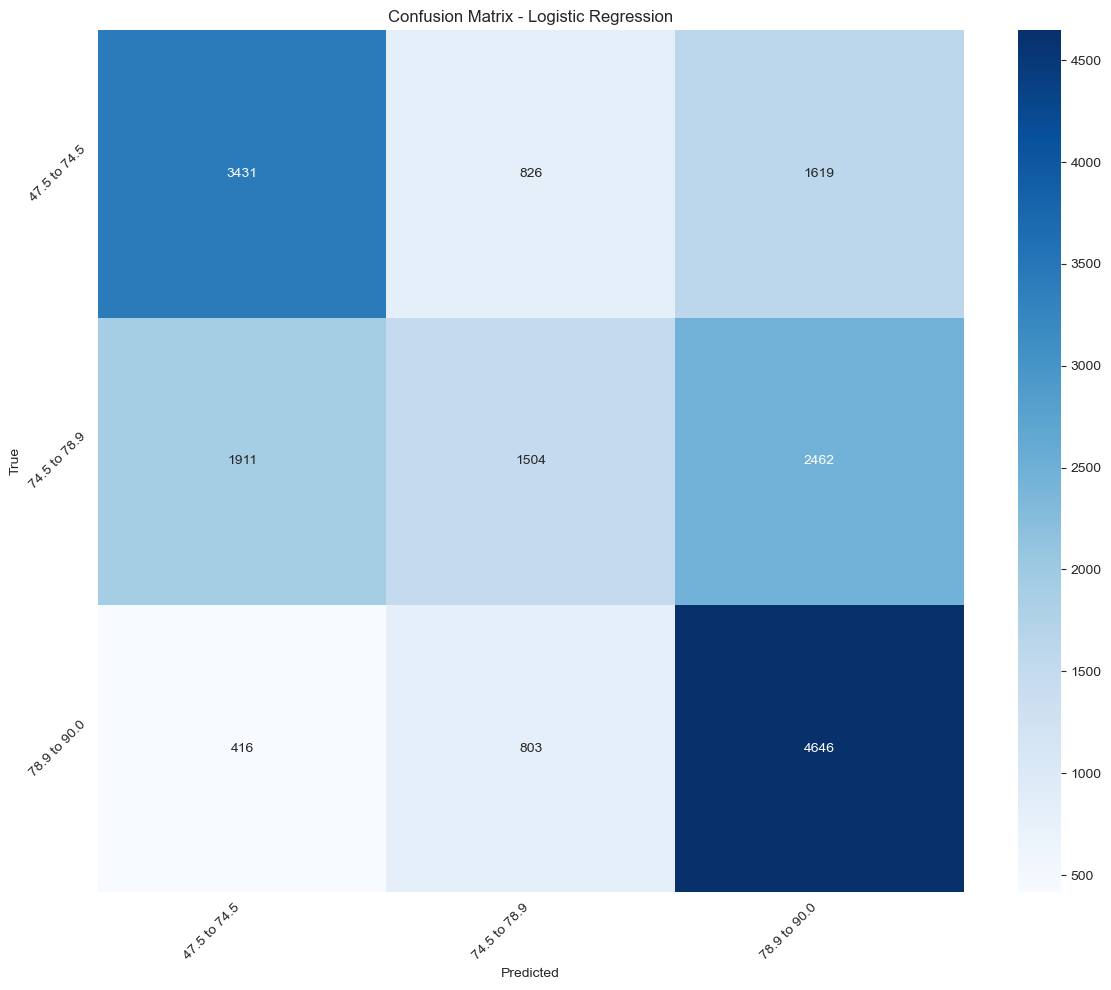

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

47.5 to 74.5       0.60      0.58      0.59      5876
74.5 to 78.9       0.48      0.26      0.33      5877
78.9 to 90.0       0.53      0.79      0.64      5865

    accuracy                           0.54     17618
   macro avg       0.54      0.54      0.52     17618
weighted avg       0.54      0.54      0.52     17618


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(
    nightsideN_df, 'north', n_bins=3
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(
    nightsideS_df, 'south', n_bins=3
)
print("\nSouth Hemisphere Results:")
print(south_results)

In [ ]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(
    nightsideN_df, 'north', n_bins=2
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(
    nightsideS_df, 'south', n_bins=2
)
print("\nSouth Hemisphere Results:")
print(south_results)